In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squidpy as sq
import pickle



sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42






 

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Name to use

In [3]:
F1_NAME = 'F1: Superficial'
F23_NAME = 'F2/3: Perivascular'
F1_NAME_REGEN= 'F1: Superficial'
F1_REGEN_NAME= 'F1: Superficial'
F6I = "F6: Inflammatory myofibroblast"



# prep colors fig2

In [4]:
sc.settings.figdir = "fig2"


In [5]:
adata_5k=sc.read_h5ad('/nfs/team361/ls34/data/adata_xenium5k_akbar_24dec_allsamples5.h5ad.fixed.revision')

In [6]:
adata_5k_fig2=adata_5k[adata_5k.obs["sample_id"].isin(["Nonlesional_atopicdermatitis1" , "Nonlesional_atopicdermatitis2"])]
adata_5k_fig2.obs["sample_id"].value_counts()

sample_id
Nonlesional_atopicdermatitis2    19988
Nonlesional_atopicdermatitis1     7669
Name: count, dtype: int64

In [7]:
desired_order = [
     F1_NAME, 'F2: Universal', F23_NAME, 'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+',
    'F5: Schwann-like', 'F5: RAMP1+','F5: NGFR+', 
    'Schwann','VE/Pericyte',  'Immune cell', 'Other'
]

adata_5k.obs['celltypes_Fig2'] = pd.Categorical(adata_5k.obs['celltypes_Fig2'], categories=desired_order, ordered=True)

adata_5k.obs["celltypes_Fig2"] =  adata_5k.obs["celltypes_Fig2"].astype('category')
adata_5k.obs["celltypes_Fig2"].value_counts()
# color_map_5k = {
#     'F3: FRC-like': '#FF0000', 
#     F23_NAME: '#0000FF', 

#     'F5: Schwann-like': "#7850b2", 
#     'VE/Pericyte': '#696969', 
#     'F2: Universal': '#ADD8E6',
    
#     F1_NAME: '#FFFF00',    'F1: Regenerative': '#FFFF00',

#     'Schwann': '#000000',
#         'F4: DS_DPEP1+': '#008000',          
#     'F4: TNN+COCH+': '#80ff80',     
#     'Other': '#DCDCDC', 
    
#     'Immune cell': "#D2B48C"
# }
# adata_5k.uns['celltypes_Fig2_colors'] = [color_map_5k[x] for x in adata_5k.obs["celltypes_Fig2"].cat.categories]


celltypes_Fig2
Other                 75608
Immune cell           37820
VE/Pericyte            8820
F1: Superficial        2454
F2: Universal          2233
F2/3: Perivascular     1529
Schwann                 581
F3: FRC-like            579
F5: RAMP1+              502
F4: DS_DPEP1+           371
F5: NGFR+               226
F4: TNN+COCH+           180
F5: Schwann-like          0
Name: count, dtype: int64

In [8]:
"""
all samples - broad immune cells (more specific immune cells below)
"""
# CATEGORY = "broad_annotation"
# KEEP_5k =[x for x in adata_5k.obs[CATEGORY].unique() if x.startswith("F") or x.startswith("Schw") or x.startswith("VE")
#           or x.startswith("Immun")
#          ]
# KEEP_5k
# adata_5k.obs["fig2"] = [x if x in KEEP_5k else "Other" for x in adata_5k.obs[CATEGORY]]

# Define the desired order for the legend
# desired_order = [
#      F1_NAME, 'F2: Universal', F23_NAME, 'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+',
#     'F5: Schwann-like', 'Schwann', 'Immune cell', 'VE/Pericyte', 'Other'
# ]

# Set the categorical order for `fig2`
#adata_5k.obs['celltypes_Fig2'] = pd.Categorical(adata_5k.obs['fig2'], categories=desired_order, ordered=True)

adata_5k.obs["celltypes_Fig2"] =  adata_5k.obs["celltypes_Fig2"].astype('category')
{x:"" for x in adata_5k.obs["celltypes_Fig2"] .unique()}

{'Other': '',
 'Immune cell': '',
 'F1: Superficial': '',
 nan: '',
 'VE/Pericyte': '',
 'F2/3: Perivascular': '',
 'F2: Universal': '',
 'F3: FRC-like': '',
 'F5: RAMP1+': '',
 'Schwann': '',
 'F5: NGFR+': '',
 'F4: DS_DPEP1+': '',
 'F4: TNN+COCH+': ''}

In [9]:
adata_5k = adata_5k[adata_5k.obs["celltypes_Fig2"]!="F5: Schwann-like"]
adata_5k.obs["celltypes_Fig2"]=adata_5k.obs["celltypes_Fig2"].fillna("Other")

/tmp/ipykernel_18660/1380523956.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k.obs["celltypes_Fig2"]=adata_5k.obs["celltypes_Fig2"].fillna("Other")


In [10]:
# color_map_5k = {
#    'Other': '#dcdcdc',
#  'Immune cell': '#dcb385',
#  'VE/Pericyte': '#8c271e',
#                 'Schwann': '#000000',
#                 'F1: Superficial': '#ffef5a',
#                 'F2: Universal':  '#91bae2',
#  'F2/3: Perivascular':  '#364f99',

#  'F3: FRC-like':  '#c6508f',

#                 'F4: DS_DPEP1+':  '#3d6f3b',
#  'F4: TNN+COCH+': '#00f273',
#                 'F5: RAMP1+':  '#4b2657',
#                                'F5: NGFR+':  '#8981a7',
    
    
#          'F6: Inflammatory myofibroblast': "#75fbfd",
#      'F7: Myofibroblast': "#2f6565",
#        'F8: Fascia-like myofibroblast': '#dd7465',
#  'F_Fascia': "#0000004D",
    
#     "Sweat gland duct":  '#A9A9A9',
#      'Sweat gland': "#777777"# '#008080',
# #  'Sweat gland channel': '#2DA8A0',
# #  'Sweat gland channelinner': '#5FCFC8',
# # # 'Sweat gland channel outer': 'Sweat gland channel outer',
# #  'Sweat gland channel_outer':
# }
# adata_5k.obs["celltypes_sFig2"]=adata_5k.obs["celltypes_sFig2"].astype('category')
# adata_5k.uns['celltypes_sFig2_colors'] = [color_map_5k[x] for x in adata_5k.obs["celltypes_sFig2"].cat.categories]

In [11]:
# adata_5k.write('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_xenium_fig2.h5ad')

In [12]:

# custom_colors = {    'F1: Superficial': '#ffef5a',
#     'F2/3: Perivascular': '#364f99',
#     'F2: Universal': '#91bae2',
#     'F3: FRC-like': '#c6508f',
#     'F4: DP_HHIP+': '#c9efb4',
#     'F4: DS_DPEP1+': '#3d6f3b',
#     'F4: TNN+COCH+': '#00f273',
#     'F5: NGFR+': '#8981a7',
#     'F5: RAMP1+': '#4b2657',
#      'F6: Inflammatory myofibroblast': "#75fbfd",
#      'F7: Myofibroblast': "#2f6565",
#        'F8: Fascia-like myofibroblast': '#dd7465',
#  'F_Fascia': "#0000004D",
#                                }

color_map_5k ={'Other': '#dcdcdc',
 'Immune cell': '#dcb385',
 'VE/Pericyte': '#8c271e',
                'Schwann': '#000000',
                'F1: Superficial': '#ffef5a',
                'F2: Universal':  '#91bae2',
 'F2/3: Perivascular':  '#364f99',

 'F3: FRC-like':  '#c6508f',

                'F4: DS_DPEP1+':  '#3d6f3b',
 'F4: TNN+COCH+': '#00f273',
                'F5: RAMP1+':  '#4b2657',
                               'F5: NGFR+':  '#8981a7',
               
               

}
custom_colors=color_map_5k

adata_5k.uns['celltypes_Fig2_colors'] = [color_map_5k[x] for x in adata_5k.obs["celltypes_Fig2"].cat.categories]


#adata_5k2 = adata_5k[adata_5k.obs['run'] =="oct"]
CATEGORY = "celltypes_Fig2"
#adata_5k=adata_5k[adata_5k.obs[CATEGORY]!="EXCLUDE"]


# for SAMPLE_INDEX, sample in enumerate( adata_5k.obs["sample_id"] .unique()):
#     print(sample)
# # if "Week 12" in sample:
#    # adata_i_f_5k=adata_5k[adata_5k.obs["info_id"]=="BK18_Non-lesional Baseline"]

#     adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
#     print(adata_i_f_5k.shape)
# #     try:
# #         adata_i_f_5k.uns.pop('celltypes_Fig2_')
# #     except:
# #         1  


#    # adata_i_f_5k.obs["fig2"] =  adata_i_f_5k.obs["fig2"].astype('category')

#     #print(adata_i_f_5k.obs["specific_celltype4"].unique())
#     # Generate the plots
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=30,
#         linewidth=0.1,
#         edgecolor='black'
#         #save="_fig2umap1a.png"
#     )
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=50,
#                 linewidth=0.01,
#         edgecolor='black'
#         #save="_fig2umap1b.png"
#     )


# for SAMPLE_INDEX, sample in enumerate( [  ]):
#     print(sample)
# # if "Week 12" in sample:
#    # adata_i_f_5k=adata_5k[adata_5k.obs["info_id"]=="BK18_Non-lesional Baseline"]

#     adata_i_f_5k = adata_5k[adata_5k.obs["info_id"] == LIST_OF_SAMPLES[SAMPLE_INDEX]]
#     print(adata_i_f_5k.shape)
#     try:
#         adata_i_f_5k.uns.pop('specific_celltype4_colors')
#     except:
#         1  


#    # adata_i_f_5k.obs["fig2"] =  adata_i_f_5k.obs["fig2"].astype('category')

#     #print(adata_i_f_5k.obs["specific_celltype4"].unique())
#     # Generate the plots
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="fig2",
#         title=sample  ,
#         size=10,
#         save="_fig2umap2.png"
#     )



# fig 2b

Nonlesional_atopicdermatitis1
(7669, 5000)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


Nonlesional_atopicdermatitis2
(19988, 5000)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


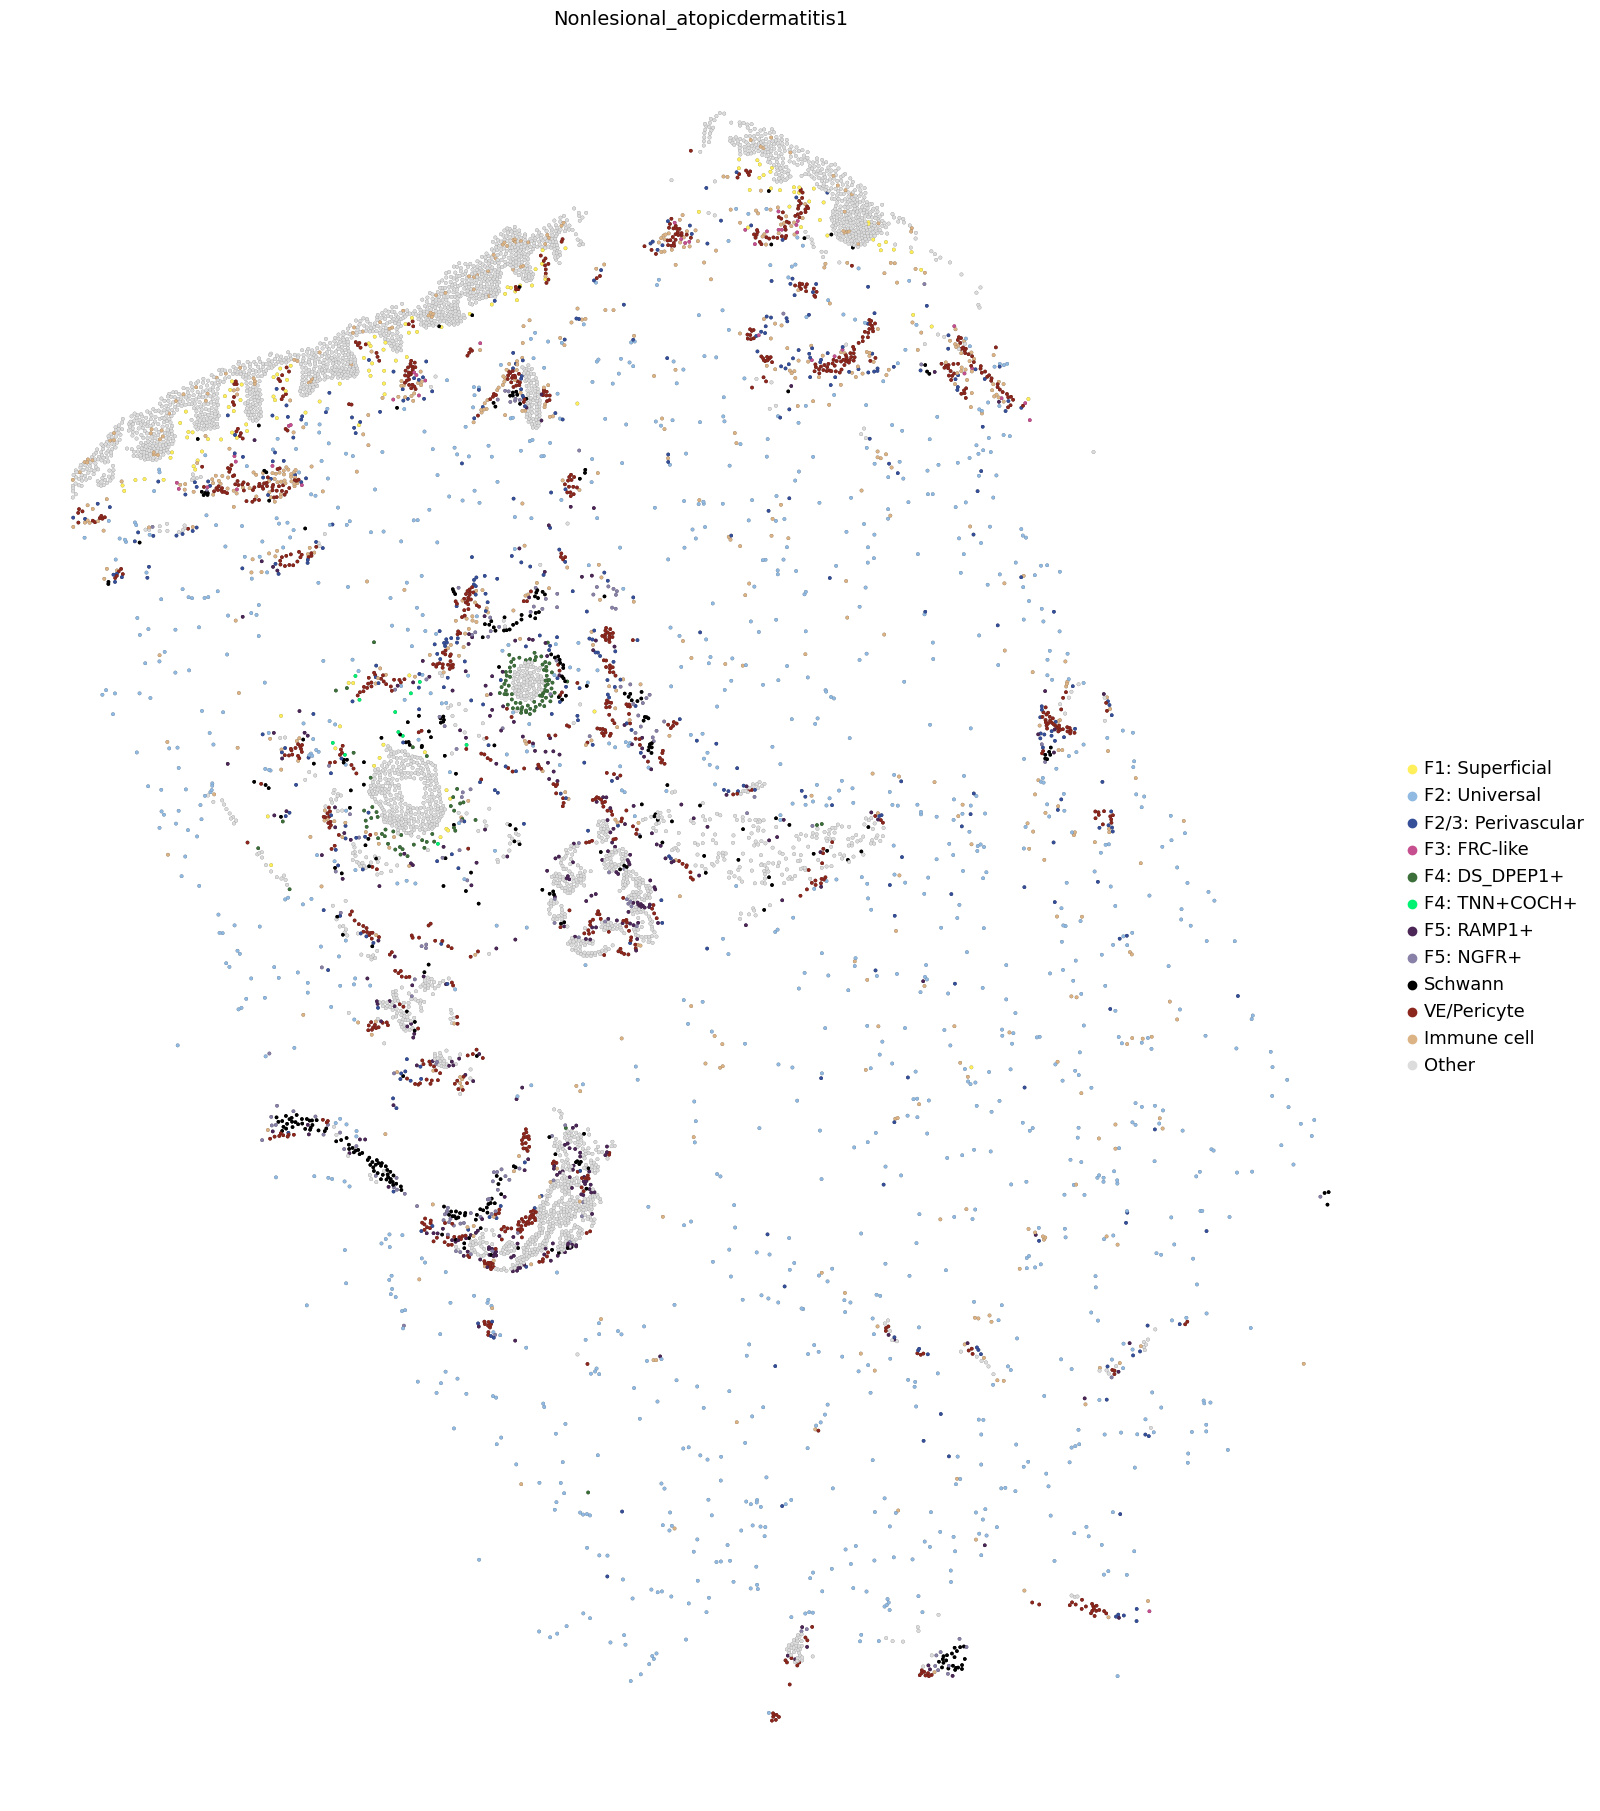

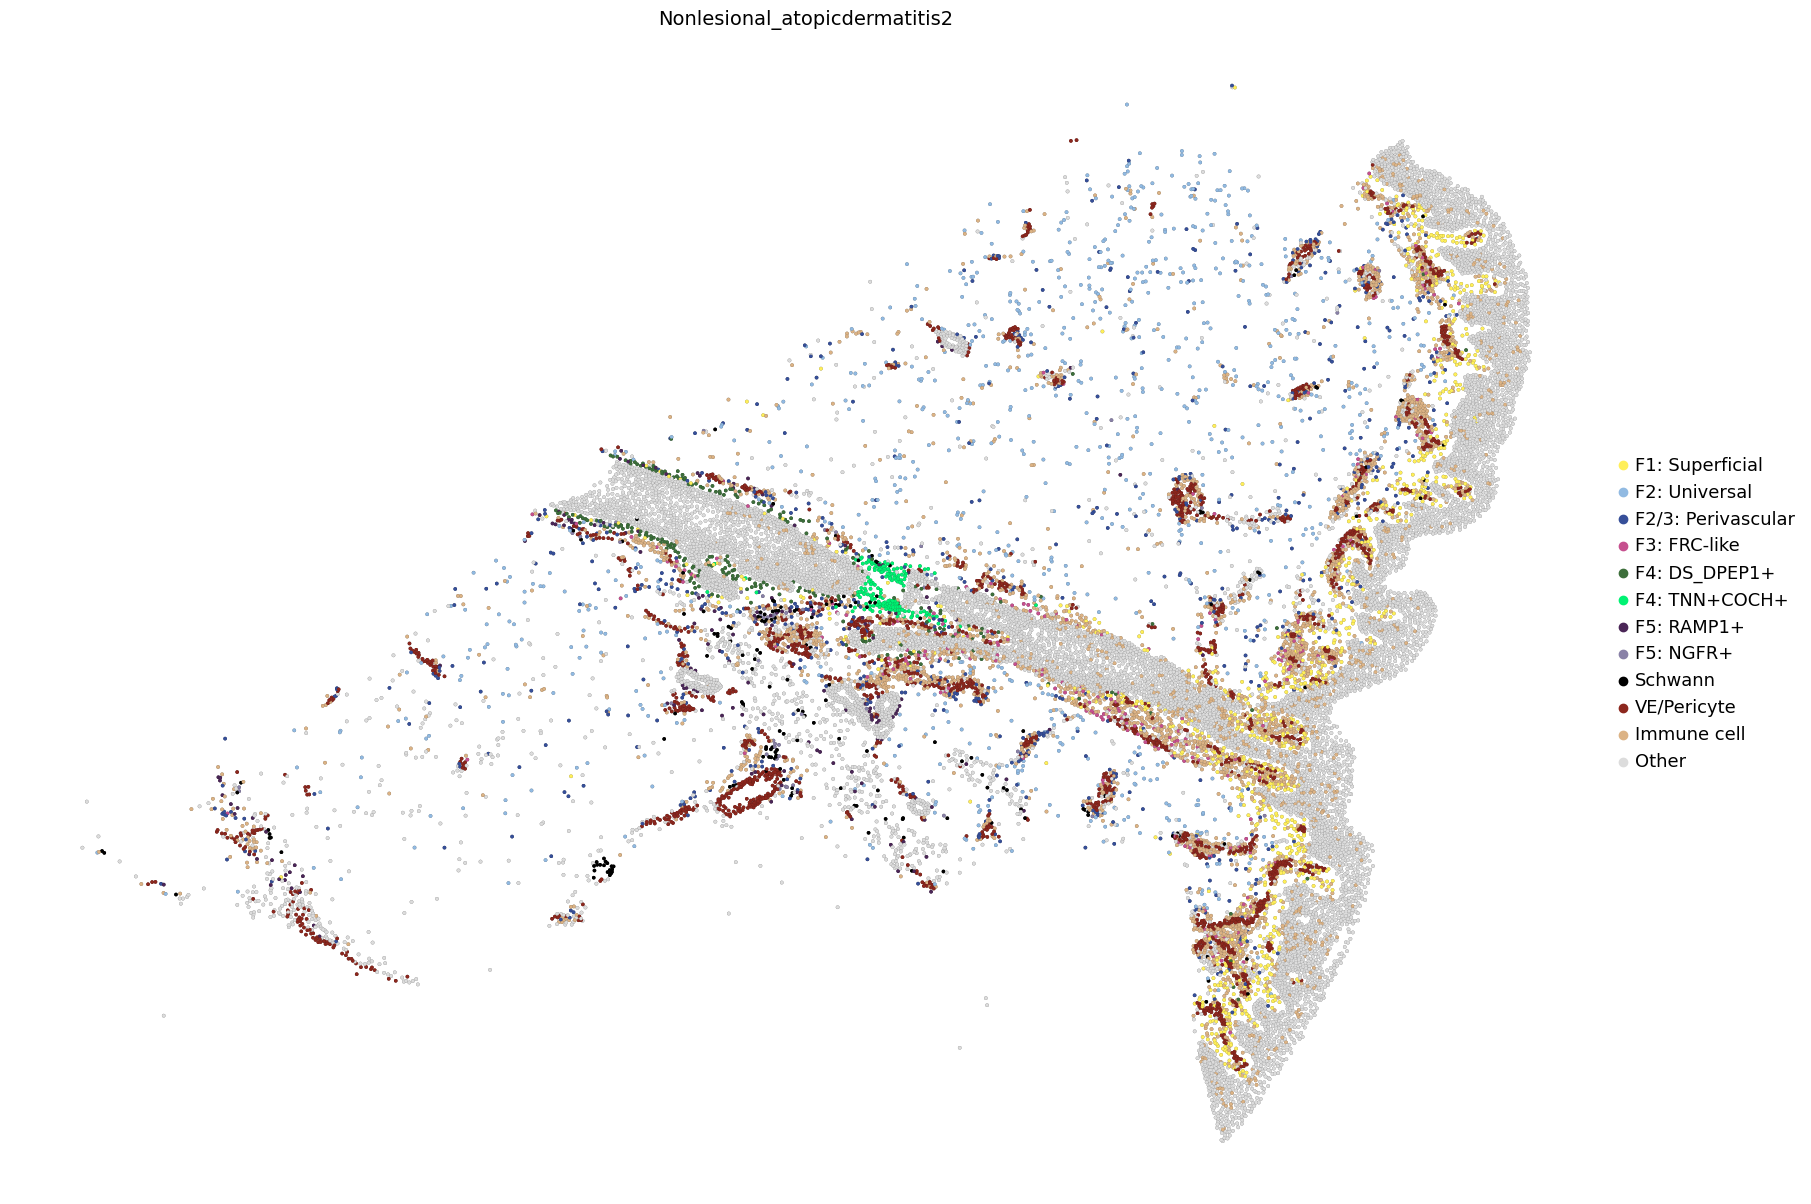

In [13]:
"""
all samples - broad immune cells (more specific immune cells below)
"""

sc.settings.set_figure_params(dpi_save=300, dpi=50, facecolor="white", frameon=False, figsize=(18,18))

CATEGORY = "celltypes_Fig2"
#adata_5k=adata_5k[adata_5k.obs[CATEGORY]!="EXCLUDE"]


for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis1" ]):
    print(sample)

    adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  

    sq.pl.spatial_scatter(
        adata_i_f_5k,
        library_id="spatial",
        shape=None,
        color="celltypes_Fig2",
        title=sample  ,
        size=25,
         linewidth=0.05,
         edgecolor='black',
      save="fig2b_umap_LHS.pdf"
    )
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='black',
#         #save="fig2b_umap_RHS.png"
#     )
    
for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis2" ]):
    print(sample)
    adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  

    sq.pl.spatial_scatter(
        adata_i_f_5k,
        library_id="spatial",
        shape=None,
        color="celltypes_Fig2",
        title=sample  ,
        size=25,
             linewidth=0.05,
         edgecolor='black',
        save="fig2b_umap_RHS.pdf"
    )
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='grey'
#        # save="_fig2umap1b.png"
#     )
    

 
   



Nonlesional_atopicdermatitis1
(7669, 5000)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


Nonlesional_atopicdermatitis2
(19988, 5000)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


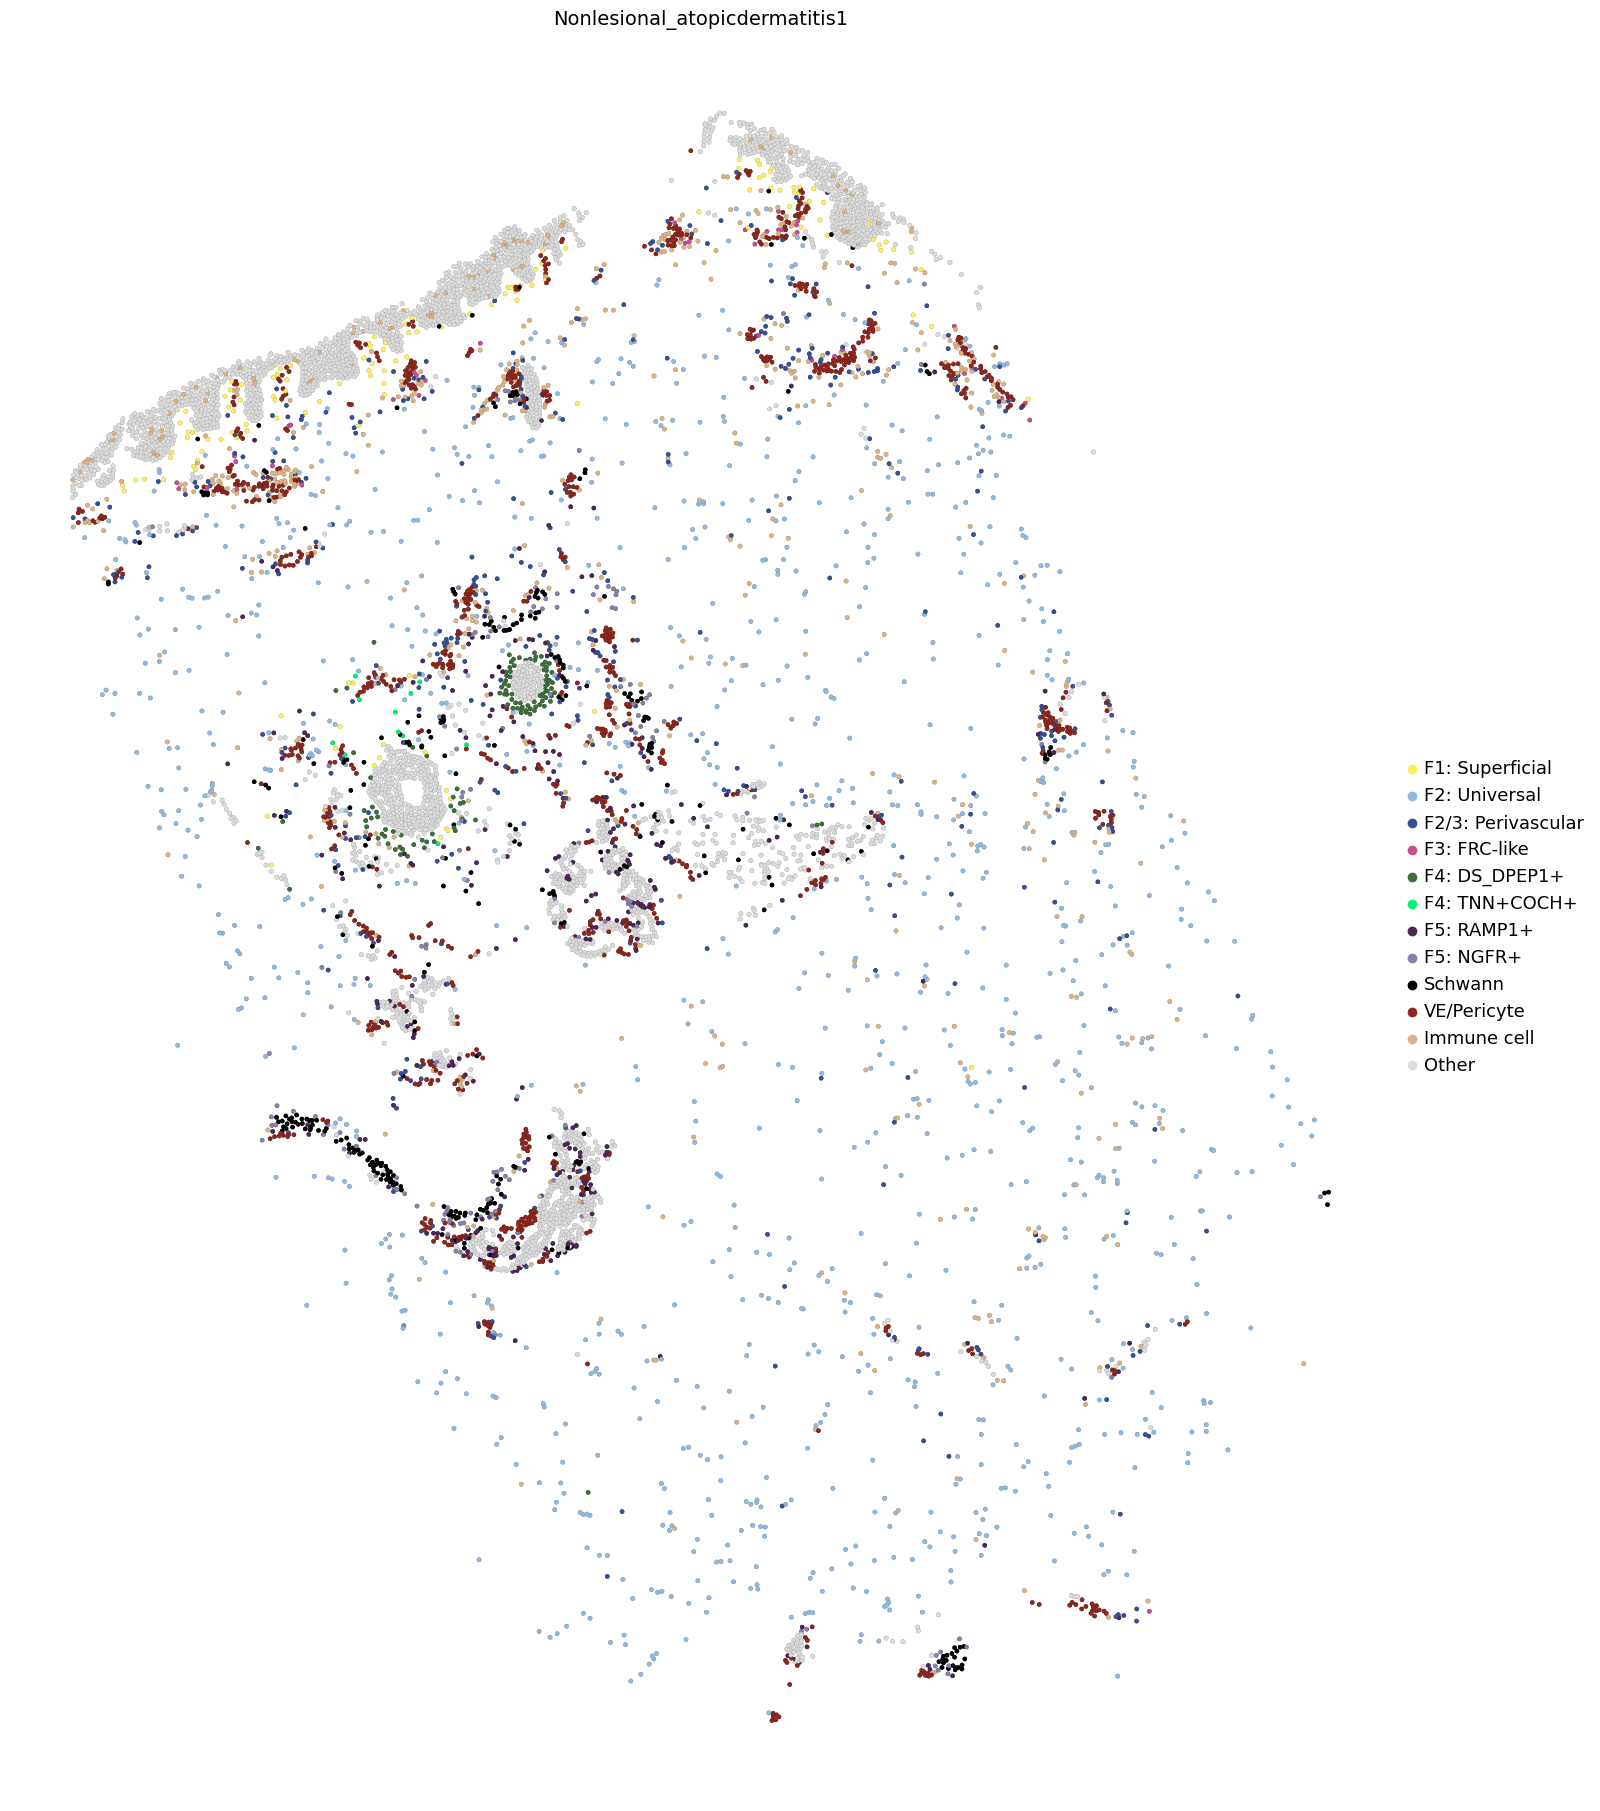

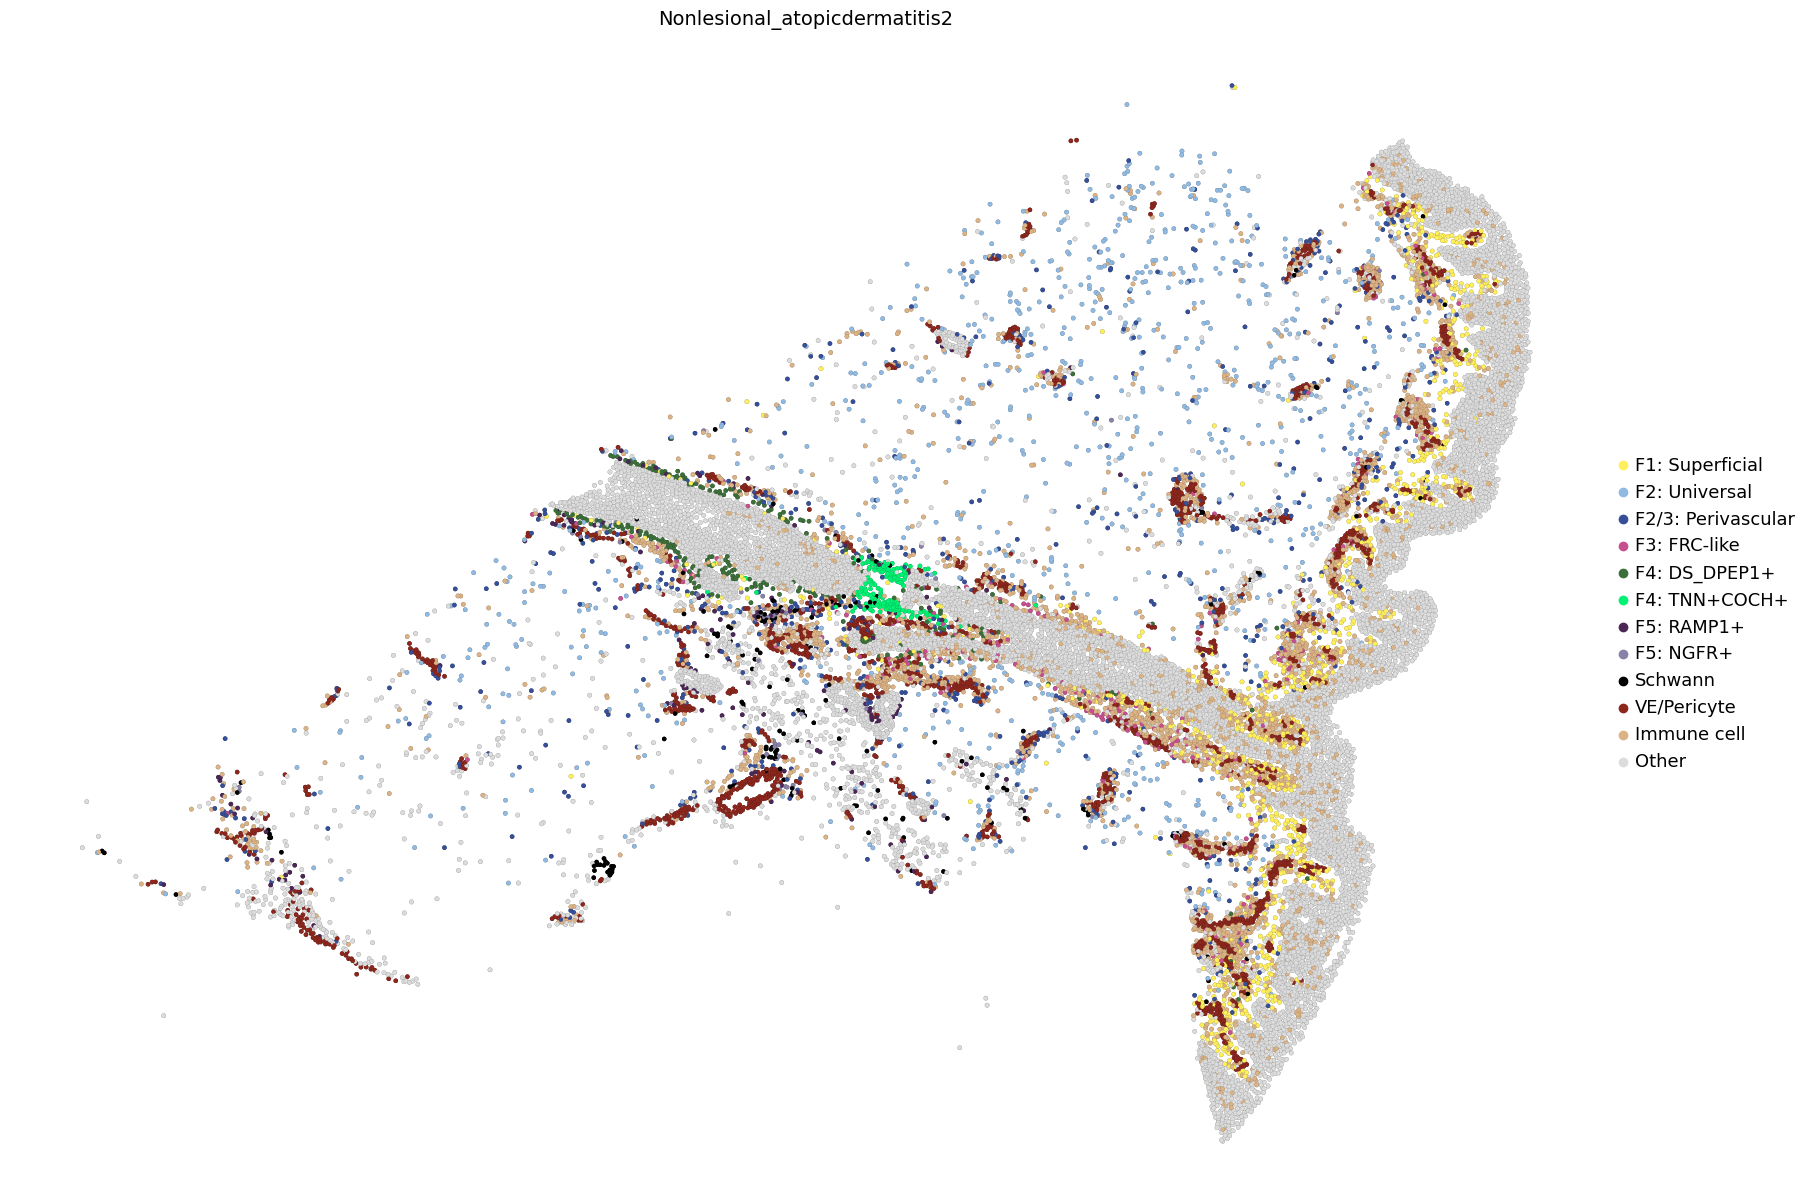

In [14]:
"""
all samples - broad immune cells (more specific immune cells below)
"""

sc.settings.set_figure_params(dpi_save=300, dpi=50, facecolor="white", frameon=False, figsize=(18,18))

CATEGORY = "celltypes_Fig2"
#adata_5k=adata_5k[adata_5k.obs[CATEGORY]!="EXCLUDE"]


for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis1" ]):
    print(sample)

    adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  

    sq.pl.spatial_scatter(
        adata_i_f_5k,
        library_id="spatial",
        shape=None,
        color="celltypes_Fig2",
        title=sample  ,
        size=40,
         linewidth=0.05,
         edgecolor='black',
      save="fig2b_umap_LHS_bigger.pdf"
    )
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='black',
#         #save="fig2b_umap_RHS.png"
#     )
    
for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis2" ]):
    print(sample)
    adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  

    sq.pl.spatial_scatter(
        adata_i_f_5k,
        library_id="spatial",
        shape=None,
        color="celltypes_Fig2",
        title=sample  ,
        size=40,
             linewidth=0.05,
         edgecolor='black',
        save="fig2b_umap_RHS_bigger.pdf"
    )
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='grey'
#        # save="_fig2umap1b.png"
#     )
    

 
   



Nonlesional_atopicdermatitis1
(7669, 5000)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


Nonlesional_atopicdermatitis2
(19988, 5000)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


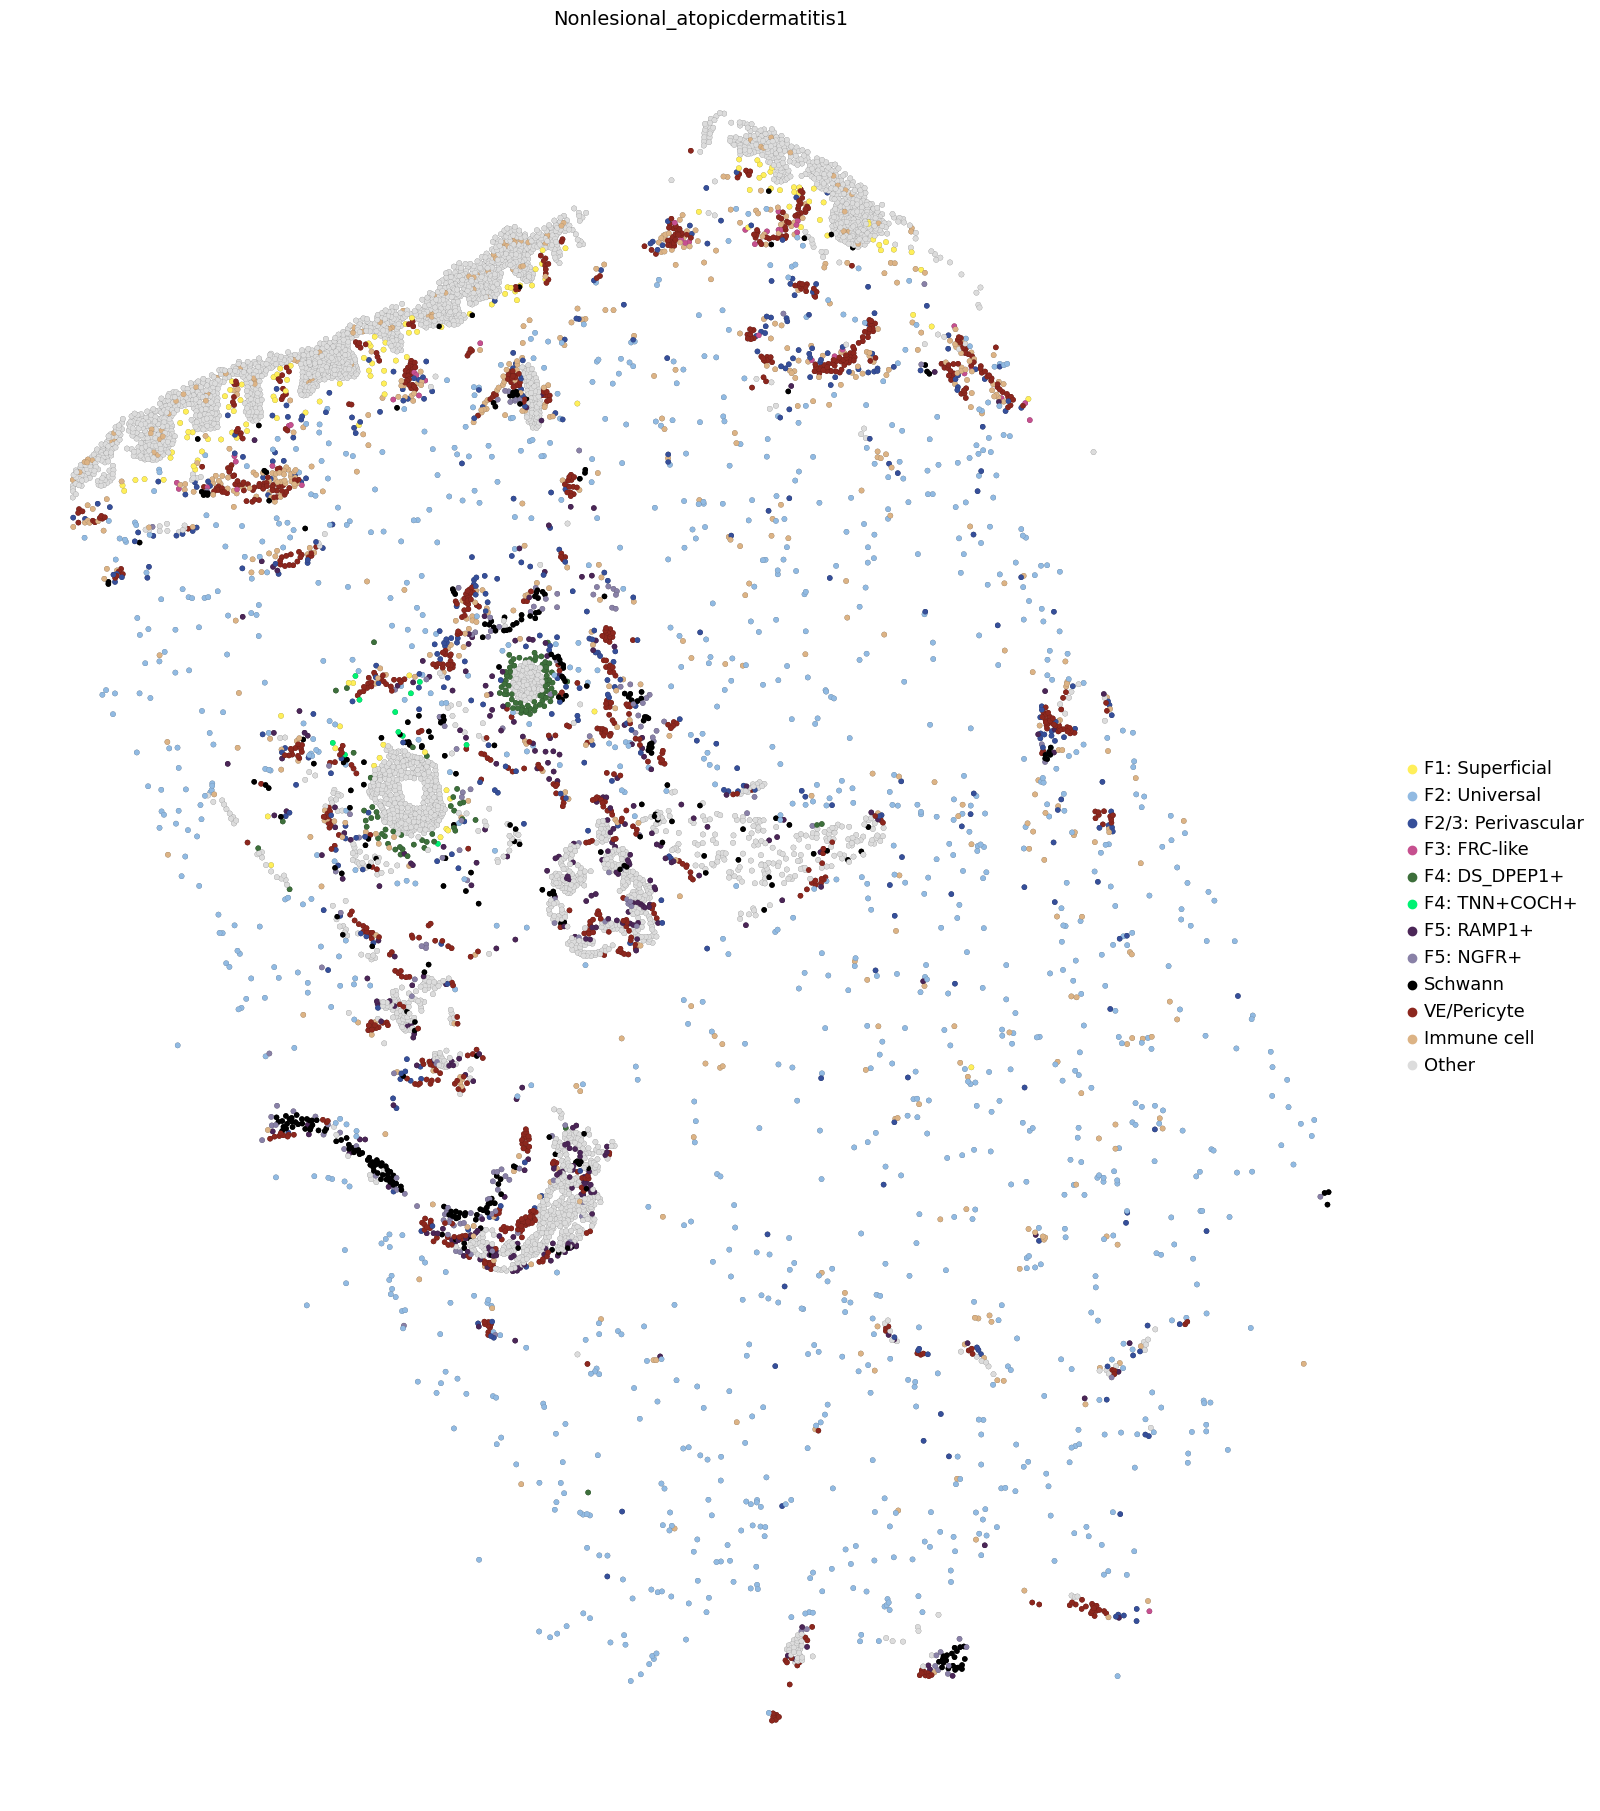

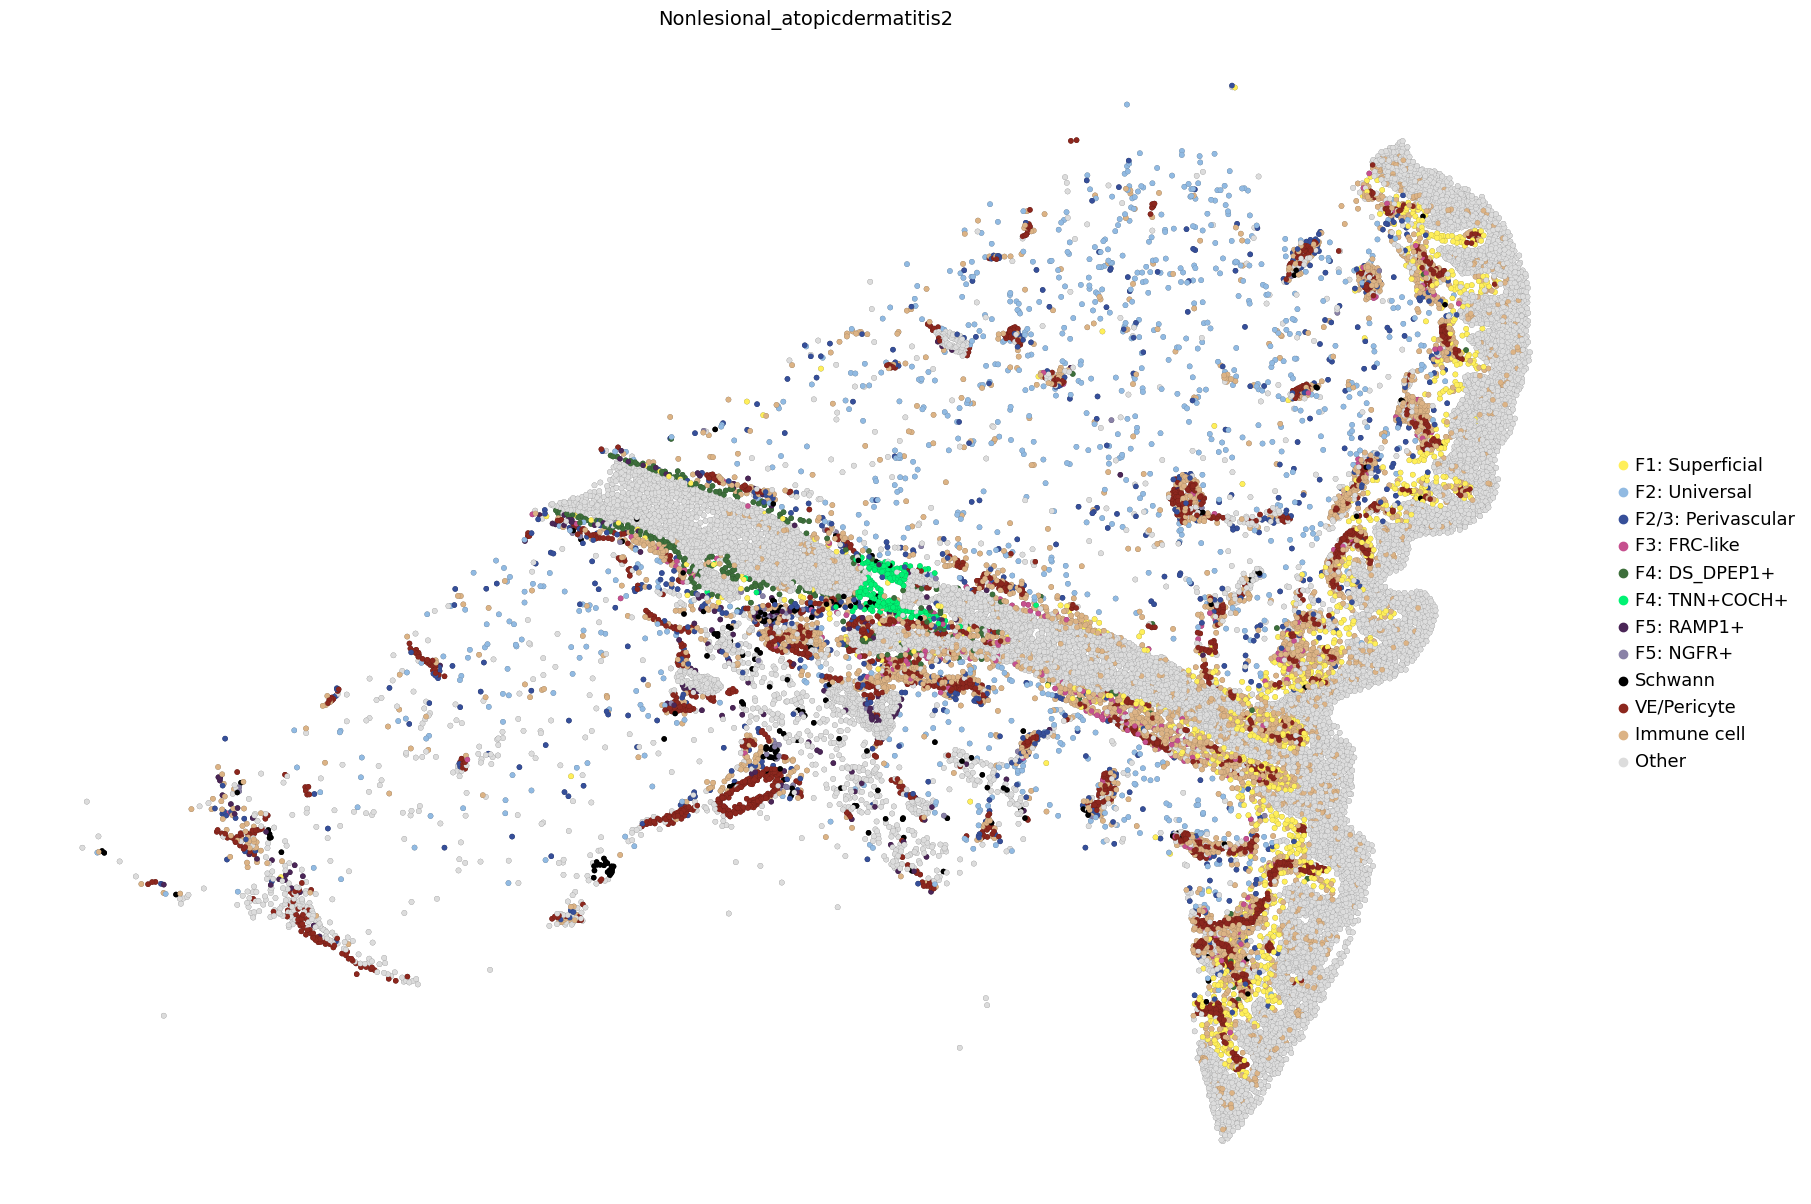

In [15]:
"""
all samples - broad immune cells (more specific immune cells below)
"""

sc.settings.set_figure_params(dpi_save=300, dpi=50, facecolor="white", frameon=False, figsize=(18,18))

CATEGORY = "celltypes_Fig2"
#adata_5k=adata_5k[adata_5k.obs[CATEGORY]!="EXCLUDE"]


for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis1" ]):
    print(sample)

    adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  

    sq.pl.spatial_scatter(
        adata_i_f_5k,
        library_id="spatial",
        shape=None,
        color="celltypes_Fig2",
        title=sample  ,
        size=60,
         linewidth=0.05,
         edgecolor='black',
      save="fig2b_umap_LHS_bigger2.pdf"
    )
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='black',
#         #save="fig2b_umap_RHS.png"
#     )
    
for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis2" ]):
    print(sample)
    adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  

    sq.pl.spatial_scatter(
        adata_i_f_5k,
        library_id="spatial",
        shape=None,
        color="celltypes_Fig2",
        title=sample  ,
        size=60,
             linewidth=0.05,
         edgecolor='black',
        save="fig2b_umap_RHS_bigger2.pdf"
    )
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='grey'
#        # save="_fig2umap1b.png"
#     )
    

 
   



Nonlesional_atopicdermatitis1
(7669, 5000)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


Nonlesional_atopicdermatitis2
(19988, 5000)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


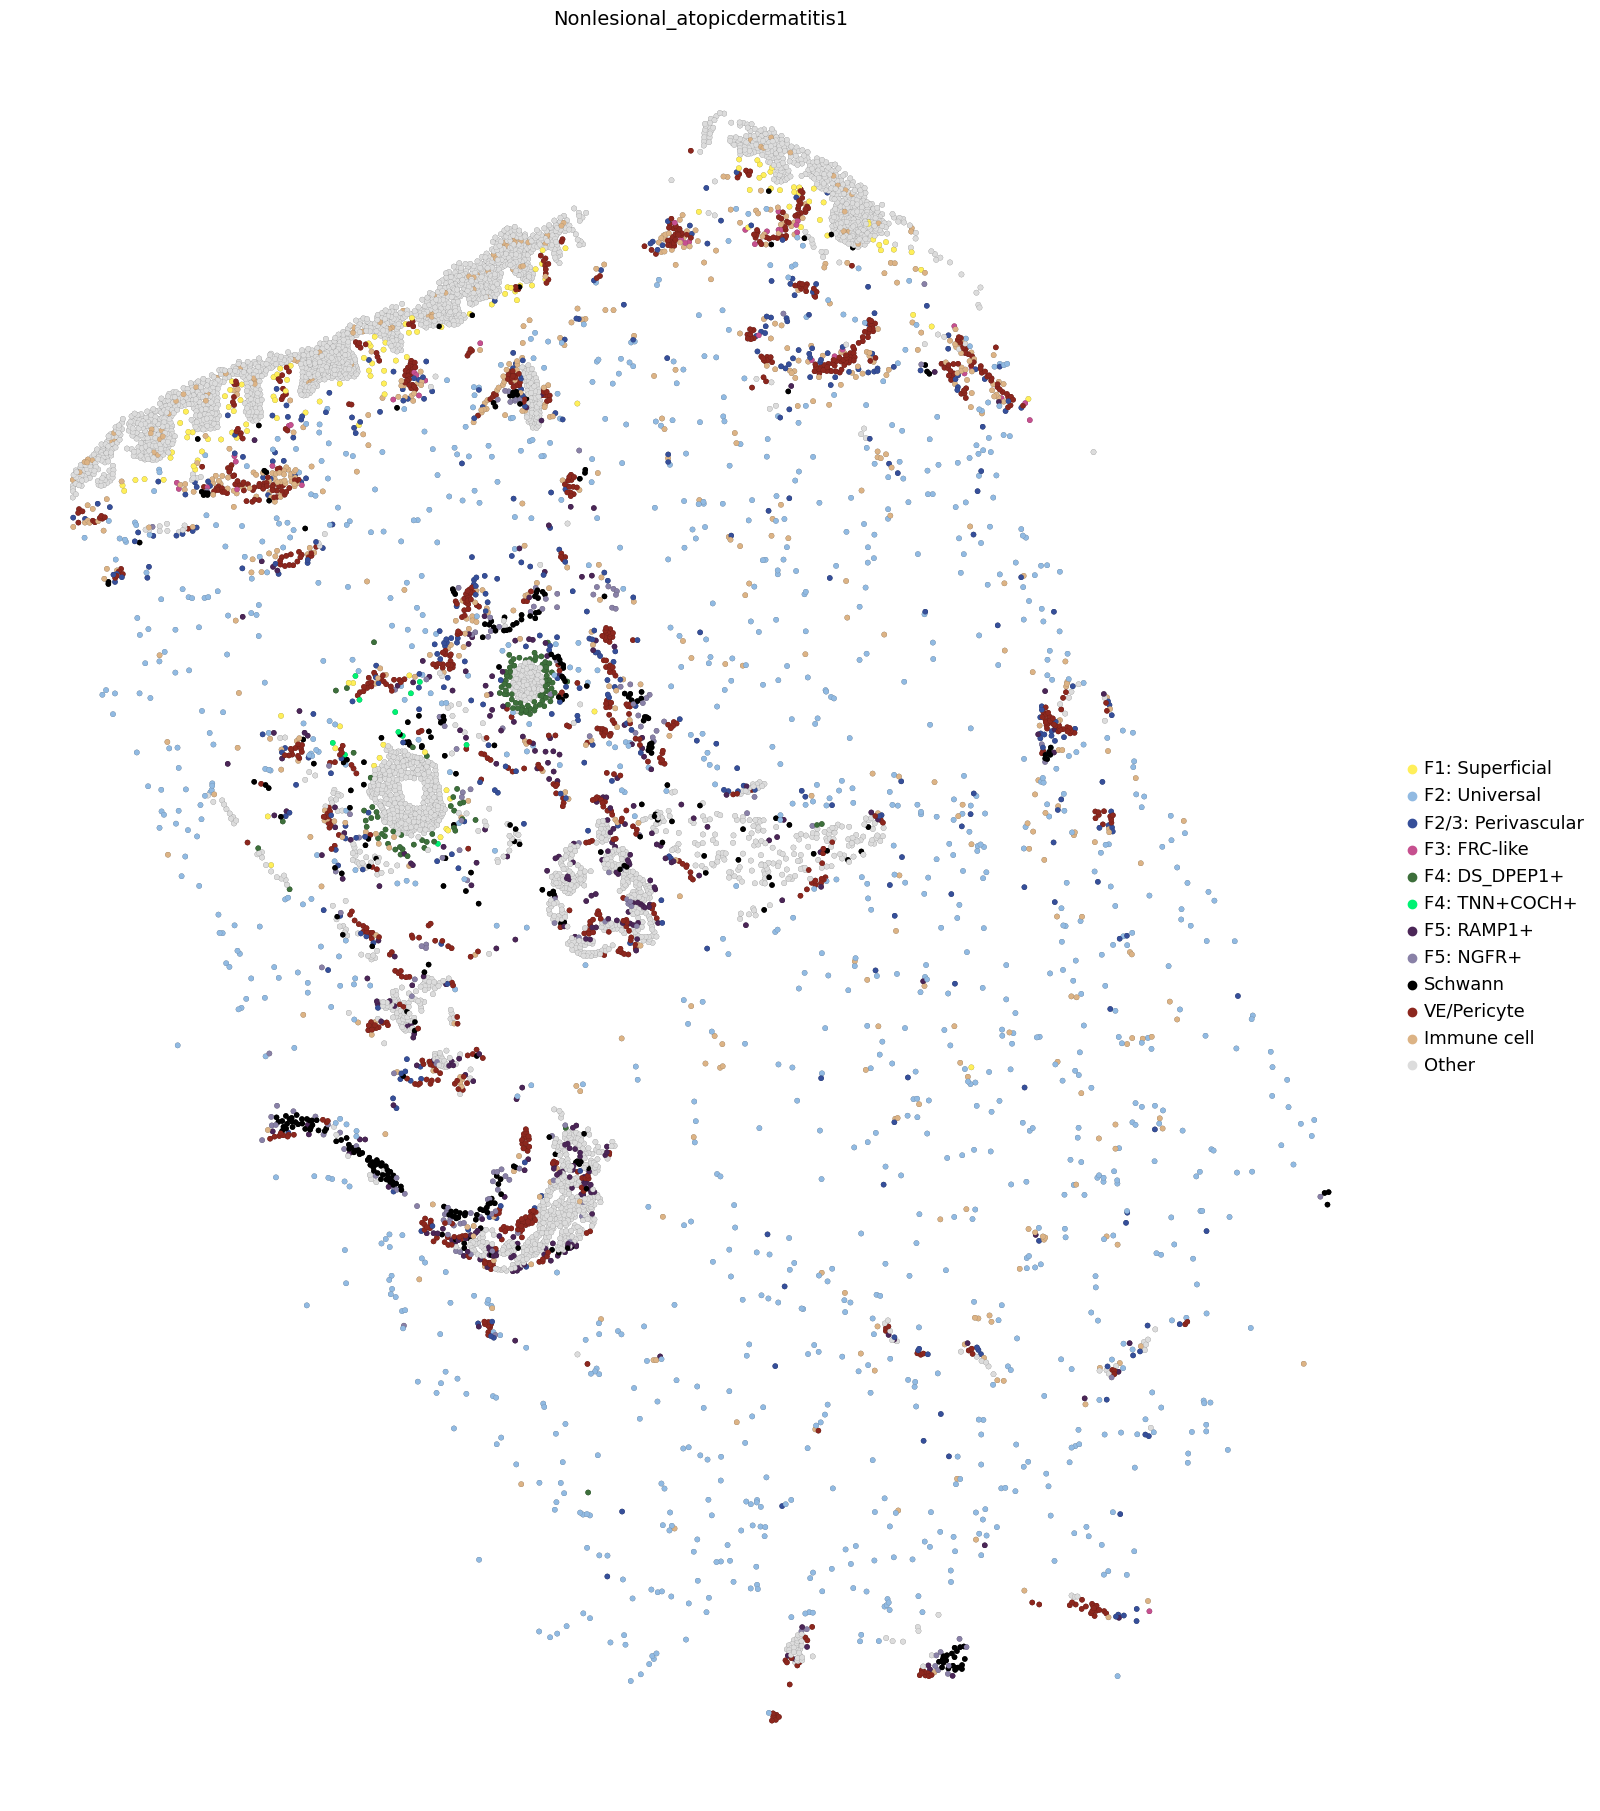

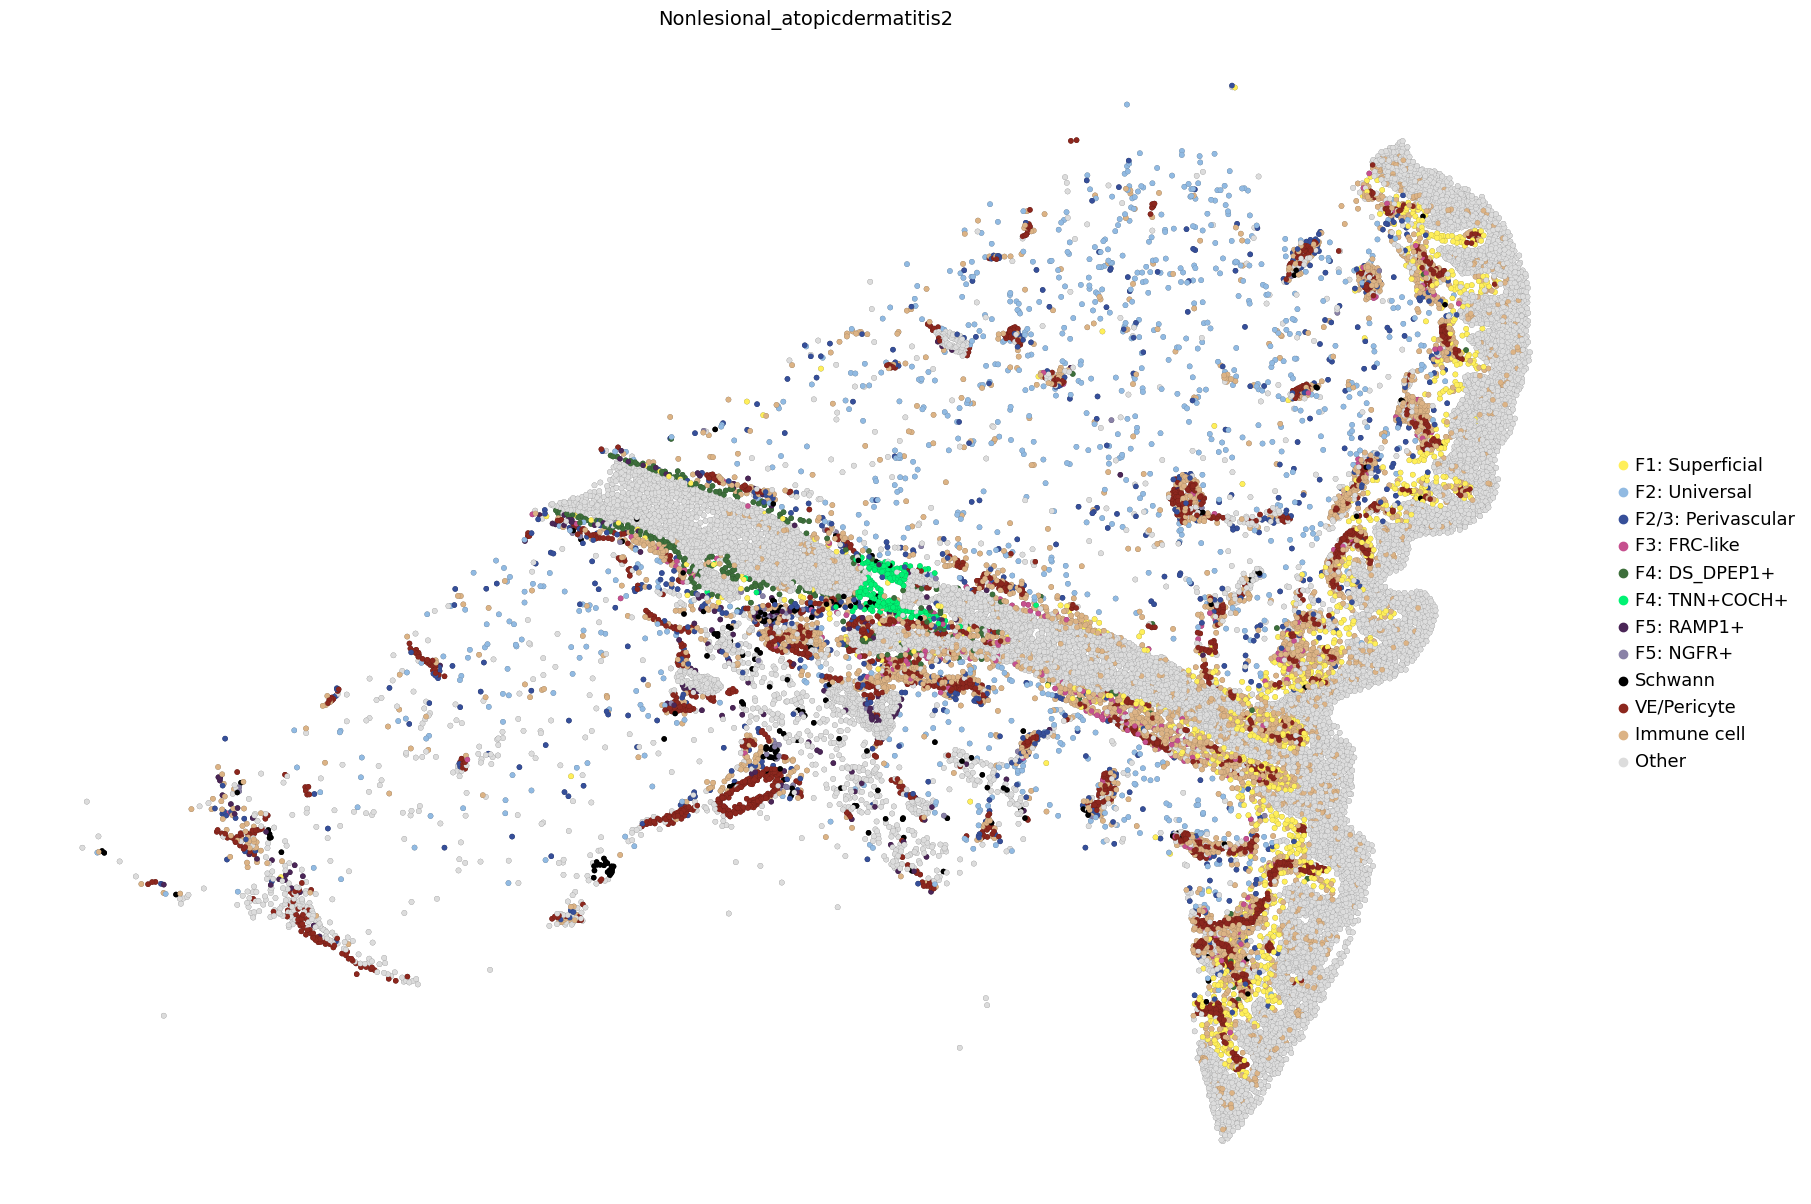

In [16]:
"""
all samples - broad immune cells (more specific immune cells below)
"""

sc.settings.set_figure_params(dpi_save=300, dpi=50, facecolor="white", frameon=False, figsize=(18,18))

CATEGORY = "celltypes_Fig2"
#adata_5k=adata_5k[adata_5k.obs[CATEGORY]!="EXCLUDE"]


for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis1" ]):
    print(sample)

    adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  

    sq.pl.spatial_scatter(
        adata_i_f_5k,
        library_id="spatial",
        shape=None,
        color="celltypes_Fig2",
        title=sample  ,
        size=60,
         linewidth=0.05,
         edgecolor='black',
      save="fig2b_umap_LHS_bigger2.pdf"
    )
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='black',
#         #save="fig2b_umap_RHS.png"
#     )
    
for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis2" ]):
    print(sample)
    adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  

    sq.pl.spatial_scatter(
        adata_i_f_5k,
        library_id="spatial",
        shape=None,
        color="celltypes_Fig2",
        title=sample  ,
        size=60,
             linewidth=0.05,
         edgecolor='black',
        save="fig2b_umap_RHS_bigger2.pdf"
    )
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='grey'
#        # save="_fig2umap1b.png"
#     )
    

 
   



In [17]:
# """
# all samples - broad immune cells (more specific immune cells below)
# """


# CATEGORY = "celltypes_Fig2"
# #adata_5k=adata_5k[adata_5k.obs[CATEGORY]!="EXCLUDE"]


# for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis1" ]):
#     print(sample)

#     adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
#     print(adata_i_f_5k.shape)
#     try:
#         adata_i_f_5k.uns.pop('specific_celltype4_colors')
#     except:
#         1  
#     adata_i_f_5k=adata_i_f_5k[adata_i_f_5k.obs["celltypes_Fig2"].str.startswith("F")]

#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=25,
#          linewidth=0.05,
#          edgecolor='black',
#      # save="fig2b_umap_LHS.png"
#     )
# #     sq.pl.spatial_scatter(
# #         adata_i_f_5k,
# #         library_id="spatial",
# #         shape=None,
# #         color="celltypes_Fig2",
# #         title=sample  ,
# #         size=40,
# #          linewidth=0.1,
# #          edgecolor='black',
# #         #save="fig2b_umap_RHS.png"
# #     )
    
# for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis2" ]):
#     print(sample)
#     adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
#     print(adata_i_f_5k.shape)
#     try:
#         adata_i_f_5k.uns.pop('specific_celltype4_colors')
#     except:
#         1  
#     #adata_i_f_5k=adata_i_f_5k[adata_i_f_5k.obs["celltypes_Fig2"]!="Other"]
#     adata_i_f_5k=adata_i_f_5k[adata_i_f_5k.obs["celltypes_Fig2"].str.startswith("F")]

#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_Fig2",
#         title=sample  ,
#         size=25,
#              linewidth=0.05,
#          edgecolor='black',
#      #   save="fig2b_umap_RHS.png"
#     )
# #     sq.pl.spatial_scatter(
# #         adata_i_f_5k,
# #         library_id="spatial",
# #         shape=None,
# #         color="celltypes_Fig2",
# #         title=sample  ,
# #         size=40,
# #          linewidth=0.1,
# #          edgecolor='grey'
# #        # save="_fig2umap1b.png"
# #     )
    

 
   



# sfig4a

In [18]:
sc.settings.figdir = "sfig4"


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


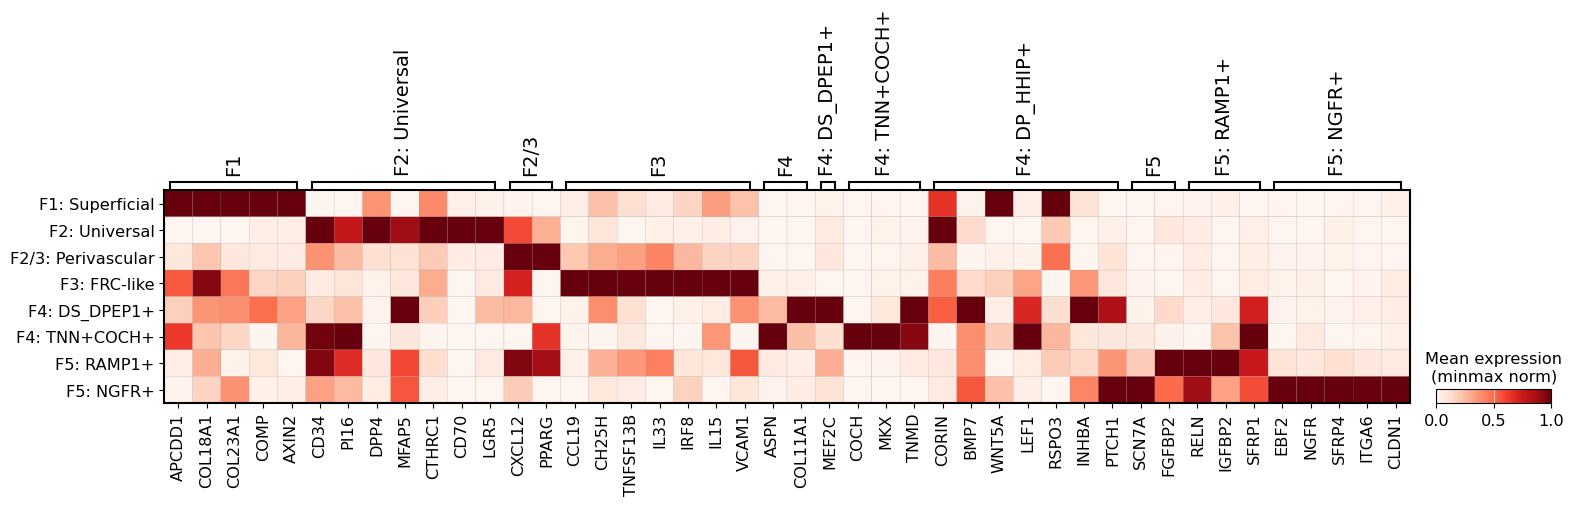

In [19]:
file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)

reynolds_short_final = {key: [gene for gene in genes if gene in adata_5k_fig2.var_names] 
                           for key, genes in reynolds_short_final.items()}

adata_5k_fig2_withfb = adata_5k_fig2[adata_5k_fig2.obs["celltypes_Fig2"].str.startswith("F")]

ORDER2 = ['F1: Superficial', 'F2: Universal', F23_NAME, 'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+',
                       # 'F5: Schwann-like', 
          "F5: RAMP1+", "F5: NGFR+"]
# sc.pl.dotplot(
#     adata_5k_fig2_withfb,
#     reynolds_short_final,
#     groupby="celltypes_Fig2",
#     standard_scale="var",
#     dendrogram=False,
#     colorbar_title="Mean expression\n(variance scaled)",
#     categories_order=  ORDER2

# ) 
sc.pl.matrixplot(
    adata_5k_fig2_withfb,
    reynolds_short_final,
    groupby="celltypes_Fig2",
   standard_scale="var",
    vmax=1,cmap="Reds",
    dendrogram=False,
    
    colorbar_title="Mean expression\n(minmax norm)",
    categories_order=  ORDER2,
    save = "a.pdf"

) 


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

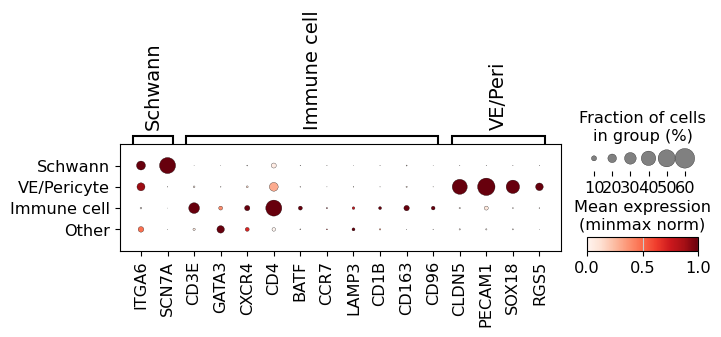

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


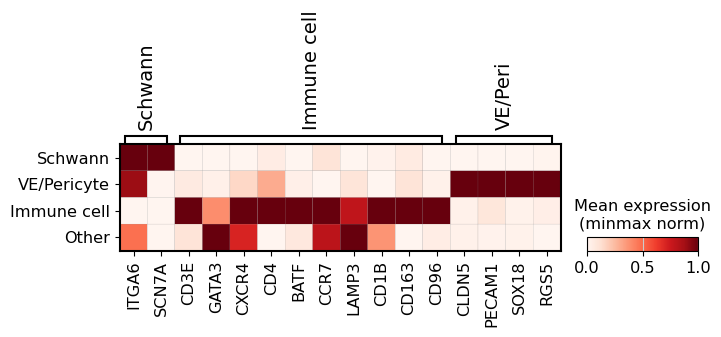

In [20]:
FIG6_GENES= {   "Schwann": ["ITGA6", "SCN7A"]   ,       
                "Immune cell": [ "CD3E", "GATA3", "CXCR4", "CD4", "BATF","CCR7", "LAMP3", "CD1B", "CD163", 'CD96'],
                    "VE/Peri": ["CLDN5", "PECAM1", "SOX18", "RGS5"],
             #"Sweat gland": ["AQP5", "CEACAM1", "CFTR", "PPP1R1B"]

              }
adata_5k_fig2_withoutfb = adata_5k_fig2[~adata_5k_fig2.obs["celltypes_Fig2"].str.startswith("F")]
 
sc.pl.dotplot(
    adata_5k_fig2_withoutfb,
    FIG6_GENES,
    groupby="celltypes_Fig2",
    standard_scale="var",
    dendrogram=False,
   #swap_axes=True,
    colorbar_title="Mean expression\n(minmax norm)"
) 
sc.pl.matrixplot(
    adata_5k_fig2_withoutfb,
    FIG6_GENES,
    groupby="celltypes_Fig2",
    standard_scale="var",cmap="Reds",
    dendrogram=False,
   #swap_axes=True,
    colorbar_title="Mean expression\n(minmax norm)",
        save="sfig4a_2.pdf"

) 

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


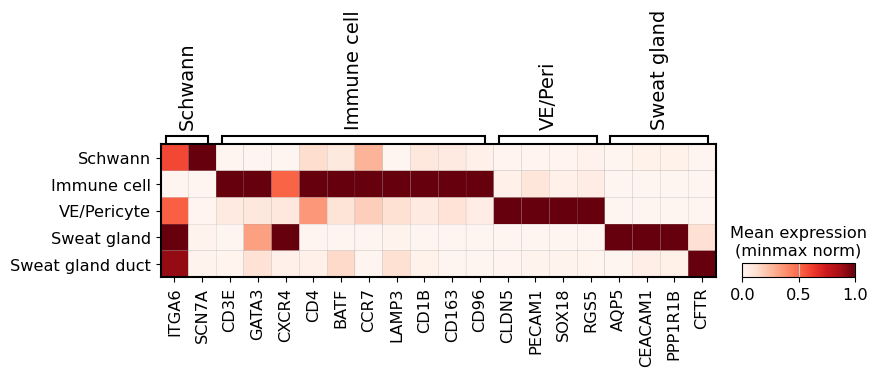

In [21]:
FIG6_GENES= {   "Schwann": ["ITGA6", "SCN7A"]   ,       
                "Immune cell": [ "CD3E", "GATA3", "CXCR4", "CD4", "BATF","CCR7", "LAMP3", "CD1B", "CD163", 'CD96'],
                    "VE/Peri": ["CLDN5", "PECAM1", "SOX18", "RGS5"],
             "Sweat gland": ["AQP5", "CEACAM1", "PPP1R1B", "CFTR", ]

              }



adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"].str.startswith("Nonles")]

    
adata_5k_fig2_withoutfb = adata_i_f_5k[~adata_i_f_5k.obs["celltypes_sFig2"].str.startswith("F")]
adata_5k_fig2_withoutfb = adata_5k_fig2_withoutfb[adata_5k_fig2_withoutfb.obs["celltypes_sFig2"]!="Other"]

ORDER= ['Schwann', "Immune cell",'VE/Pericyte',  'Sweat gland', 'Sweat gland duct',# "Other"
       ]

# sc.pl.dotplot(
#     adata_5k_fig2_withoutfb,
#     FIG6_GENES,
#     groupby="celltypes_sFig2",
#     standard_scale="var",
#     dendrogram=False,
#    #swap_axes=True,
#     colorbar_title="Mean expression\n(variance scaled)",
#     categories_order=ORDER
# ) 
sc.pl.matrixplot(
    adata_5k_fig2_withoutfb,
    FIG6_GENES,
    groupby="celltypes_sFig2",
    standard_scale="var",cmap="Reds",
    dendrogram=False,
   #swap_axes=True,
    colorbar_title="Mean expression\n(minmax norm)",
        categories_order=ORDER,
    save="sfig4a_alt.pdf"

) 

In [22]:
{x:x for x in adata_5k.obs["celltypes_sFig4_melanoma"].unique()}

{'KC': 'KC',
 'T': 'T',
 'Other myeloid': 'Other myeloid',
 'Melanoma': 'Melanoma',
 'F1: Superficial': 'F1: Superficial',
 'F6: Inflammatory myofibroblast': 'F6: Inflammatory myofibroblast',
 'F7: Myofibroblast': 'F7: Myofibroblast',
 'Bcell/plasma cell': 'Bcell/plasma cell',
 'VE/Pericyte': 'VE/Pericyte',
 'LE': 'LE',
 'F2/3: Perivascular': 'F2/3: Perivascular',
 'Melanocyte': 'Melanocyte',
 'F2: Universal': 'F2: Universal',
 'F3: FRC-like': 'F3: FRC-like',
 'Mast cell': 'Mast cell',
 'Treg': 'Treg',
 'Schwann': 'Schwann',
 'KC_HF': 'KC_HF',
 'KC_Sebocyte': 'KC_Sebocyte',
 'Sweat gland': 'Sweat gland',
 'Adipocyte': 'Adipocyte',
 'Muscle': 'Muscle',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
 'F5: Schwann-like': 'F5: Schwann-like',
 'Nonspecific': 'Nonspecific',
 'F4: TNN+COCH+': 'F4: TNN+COCH+',
 'MigDC': 'MigDC'}

In [31]:
RENAME = {

 'Muscle': 'Muscle',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',

 'F4: TNN+COCH+': 'F4: TNN+COCH+',
}
adata_5k.obs["sfig4"] =  adata_5k.obs["celltypes_sFig4_melanoma"].map(RENAME).fillna("Other")

{x:x for x in adata_5k.obs["sfig4"] .unique()}

{'Other': 'Other',
 'Muscle': 'Muscle',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
 'F4: TNN+COCH+': 'F4: TNN+COCH+'}

In [33]:

color_map_4d ={'Other': '#dcdcdc',


                'F4: DS_DPEP1+':  '#3d6f3b',
 'F4: TNN+COCH+': '#00f273',
                               'Muscle':  '#FF0000',
               
               

}
adata_5k.obs["sfig4"] =adata_5k.obs["sfig4"] .astype('category')
adata_5k.uns['sfig4_colors'] = [color_map_4d[x] for x in adata_5k.obs["sfig4"].cat.categories]

Nonlesional_atopicdermatitis2
(19988, 5000)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


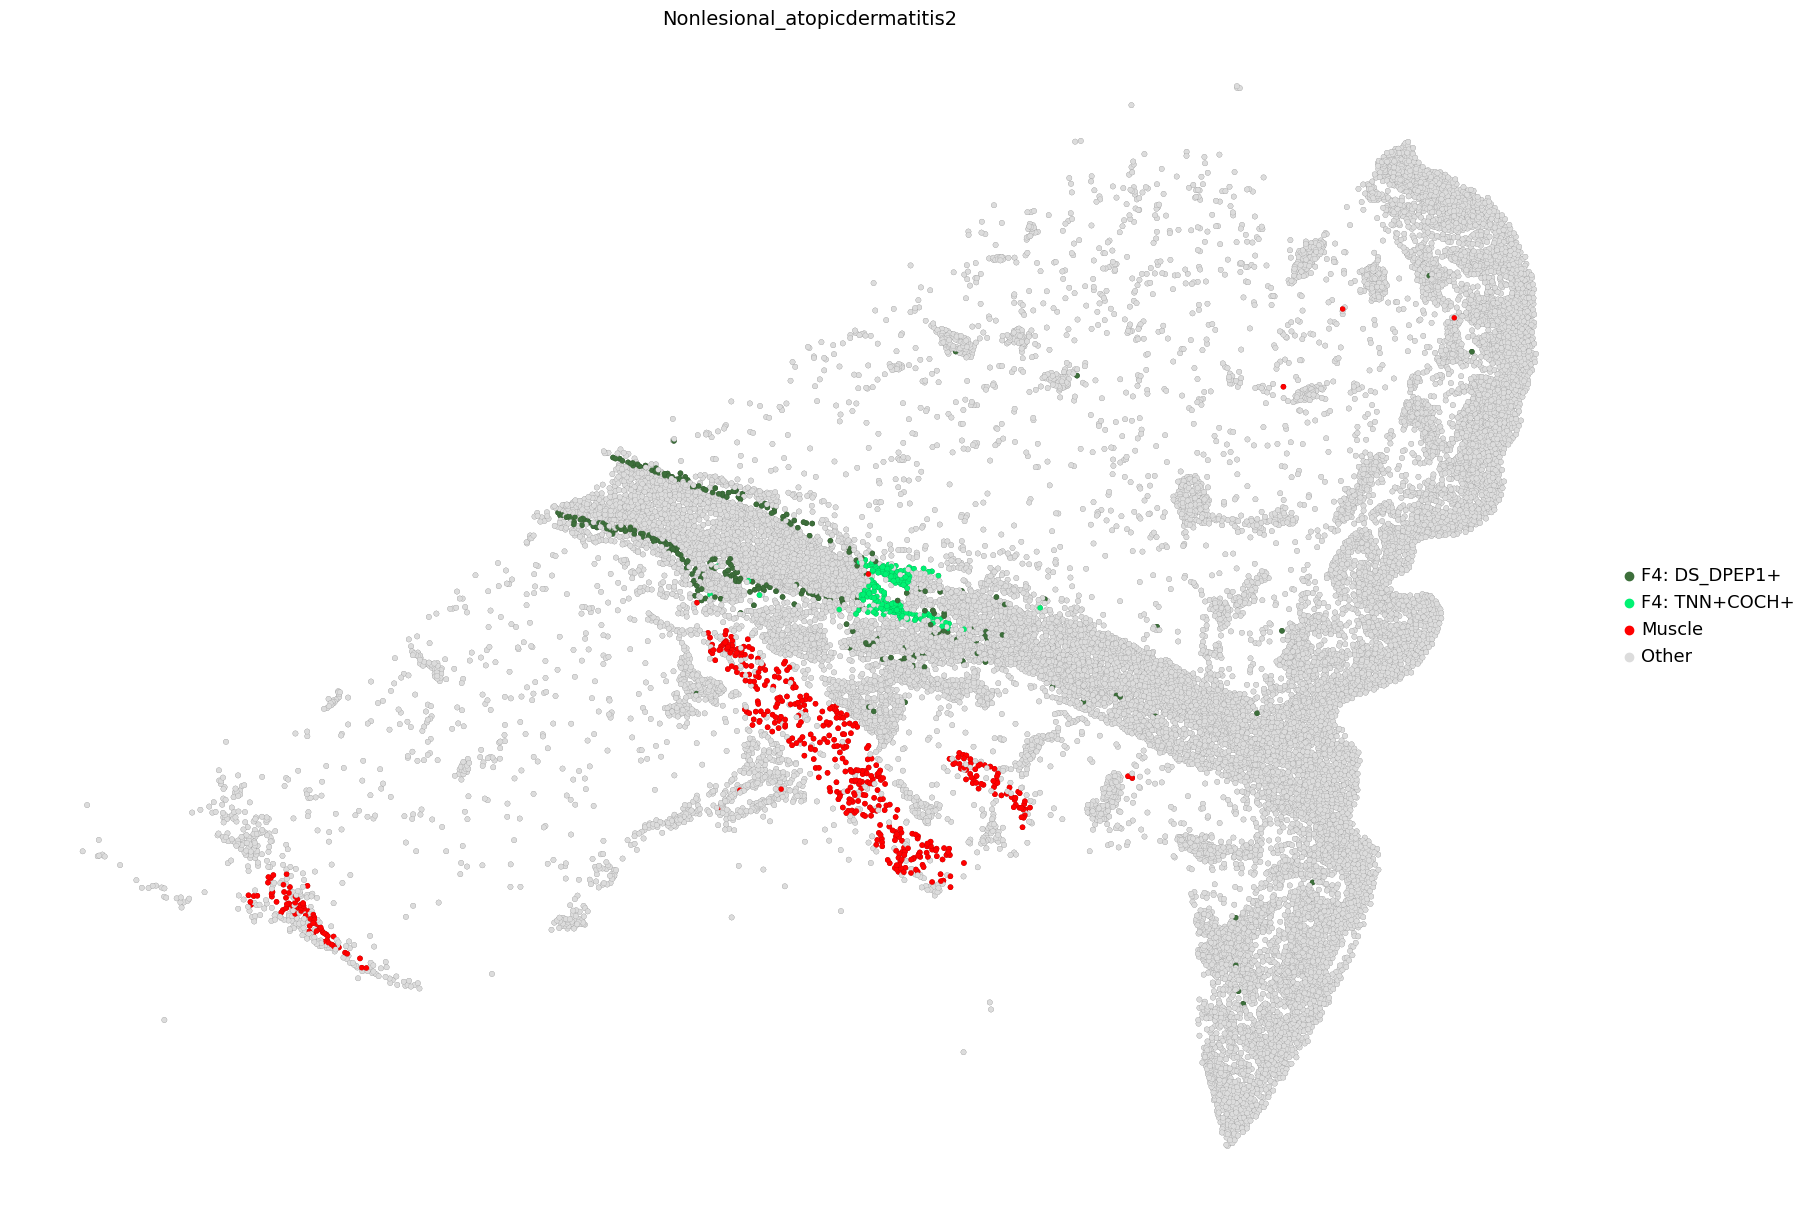

In [35]:
for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis2" ]):
    print(sample)
    adata_i_f_5k = adata_5k[adata_5k.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  

    sq.pl.spatial_scatter(
        adata_i_f_5k,
        library_id="spatial",
        shape=None,
        color="sfig4",
        title=sample  ,
        size=60,
             linewidth=0.05,
         edgecolor='black',
        save="sfig4d.pdf"
    )


In [ ]:

# adata_5k_fig2.obs["celltypes_sFig2"] =  adata_5k_fig2.obs["celltypes_sFig2"].astype('category')


# color_map_5k = {
#     'F3: FRC-like': "#FF1493",#  '#FF0000', 
#     F23_NAME: '#0000FF',
#         F23_NAME: '#0000FF',

#     #'F2 Universal/F1': '#4d4d4d',

#     'F5: Schwann-like': "#7850b2", #'#800080',
#     'VE/Pericyte':"#FFC0CB",# "#8B0000", "#FFC1C1", #'#696969', #'#A9A9A9',  "#FF0000", 
#     'F2: Universal': '#ADD8E6',
#     #'F2 Universal/F1': '#0000FF',
    
#     "F1: Superficial": '#FFFF00',    'F1: Regenerative': '#FFFF00',

#     'Schwann': '#000000',
    
#     # Updated F4 colors
#     'F4: DS_DPEP1+': '#008000',         # Dark green
#     #'F4: Mixed': '#',      # Mid green (standard green)
#     'F4: TNN+COCH+': '#80ff80',     # Very light green
#     'F5: RAMP1+': "#9D99C8",
#     "F5: NGFR+": "#FF6700",
#     'Other': '#DCDCDC', #'lightgrey'
    
#     'Immune cell': "#D2B48C",
#     "Sweat gland duct":  '#A9A9A9',
#      'Sweat gland': "#777777"# '#008080',
# #  'Sweat gland channel': '#2DA8A0',
# #  'Sweat gland channelinner': '#5FCFC8',
# # # 'Sweat gland channel outer': 'Sweat gland channel outer',
# #  'Sweat gland channel_outer':
# }
# adata_5k_fig2.obs["celltypes_sFig2"]=adata_5k_fig2.obs["celltypes_sFig2"].astype('category')
# adata_5k_fig2.uns['celltypes_sFig2_colors'] = [color_map_5k[x] for x in adata_5k_fig2.obs["celltypes_sFig2"].cat.categories]


#adata_5k2 = adata_5k[adata_5k.obs['run'] =="oct"]
CATEGORY = "celltypes_sFig2"


In [ ]:
ORDER1 = [
          'F1: Superficial',
 'F2: Universal',
 'F2/3: Perivascular',

 'F3: FRC-like',
     'F4: DS_DPEP1+',
 'F4: TNN+COCH+',
     'F5: RAMP1+',
     'F5: NGFR+',
     'Schwann',
        'Sweat gland',
     'Sweat gland duct',

 'VE/Pericyte',


    'Immune cell', 
    'Other',



]    
adata_5k_fig2.obs["celltypes_sFig2"] = adata_5k_fig2.obs["celltypes_sFig2"].cat.reorder_categories(ORDER1, ordered=True)


In [ ]:
for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis1" ]):
    print(sample)

    adata_i_f_5k = adata_5k_fig2[adata_5k_fig2.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  


#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_sFig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='grey',
#         #show=False
#        # save="_fig2umap1b.png"
#     )
    
    
desired_order = [F1_NAME, 'F2: Universal', F23_NAME, 'F3: FRC-like', #'F5: Schwann-like'
                "F5: RAMP1+", "F5: NGFR+"
                ]
desired_order = desired_order[::-1]

# custom_colors ={'F2: Universal': [0.81411765, 0.88392157, 0.94980392, 1.        ],
#                 F1_NAME: [1.        , 0.97244137, 0.75680123, 1.        ],
#                   'F1: Regenerative': [1.        , 0.97244137, 0.75680123, 1.        ],
#                 'F3: FRC-like': [0.99692426, 0.89619377, 0.84890427, 1.        ],
#                 'F4': [0.50196078, 0.79058824, 0.50143791, 1.        ],
#                 F23_NAME: [0.47294118, 0.71163399, 0.85071895, 1.        ],
#                 'F5: Schwann-like': [0.56608997, 0.55218762, 0.75933872, 1.        ],
#                     'F5: RAMP1+': "#9D99C8",
#     "F5: NGFR+": "#FF6700",

#                }
custom_colors = {    'F1: Superficial': '#ffef5a',
    'F2/3: Perivascular': '#364f99',
    'F2: Universal': '#91bae2',
    'F3: FRC-like': '#c6508f',
    'F4: DP_HHIP+': '#c9efb4',
    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: RAMP1+': '#4b2657',
     'F6: Inflammatory myofibroblast': "#75fbfd",
     'F7: Myofibroblast': "#2f6565",
       'F8: Fascia-like myofibroblast': '#dd7465',
 'F_Fascia': "#0000004D",
                               }


adata_eczema_fbs_nl = adata_i_f_5k[adata_i_f_5k.obs["celltypes_Fig2"].str.startswith("F")]
proportions = adata_eczema_fbs_nl.obs['celltypes_Fig2'].value_counts(normalize=True)

proportions_filtered_nl= proportions[proportions.index != 'Nonspecific']

proportions_filtered_nl = proportions_filtered_nl.reindex(desired_order)

fig, ax = plt.subplots(figsize=(1, 6))  

previous_proportion = 0
for proportion, label in zip(proportions_filtered_nl, proportions_filtered_nl.index):
    color = custom_colors.get(label, '#D3D3D3')   
    ax.bar([1], [proportion], bottom=previous_proportion, color=color, label=label,
                   linewidth=0.5,   
        width=0.5,        edgecolor='black',  

           
          )
    previous_proportion += proportion

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', bbox_to_anchor=(1, 1),
          frameon=False)

ax.set_xticks([])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.set_ylabel('Proportion')
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(False)
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=12)
plt.show()

 
    
for SAMPLE_INDEX, sample in enumerate( [ "Nonlesional_atopicdermatitis2" ]):
    print(sample)
    adata_i_f_5k = adata_5k_fig2[adata_5k_fig2.obs["sample_id"] == sample]
    print(adata_i_f_5k.shape)
    try:
        adata_i_f_5k.uns.pop('specific_celltype4_colors')
    except:
        1  
 
#     sq.pl.spatial_scatter(
#         adata_i_f_5k,
#         library_id="spatial",
#         shape=None,
#         color="celltypes_sFig2",
#         title=sample  ,
#         size=40,
#          linewidth=0.1,
#          edgecolor='grey',
#         #show=False

#        # save="_fig2umap1b.png"
#     )
    

 
   



In [ ]:
adata_5k_fig2.obs["sample_id"].value_counts()
adata_5k_fig2_i=adata_5k_fig2[adata_5k_fig2.obs["sample_id"]=="Nonlesional_atopicdermatitis2"]

sq.gr.spatial_neighbors(adata_5k_fig2_i, 
                             spatial_key='spatial', #elements_to_coordinate_systems=None, table_key=None, library_key=None, coord_type=None, 
                             #n_neighs=4,
                            radius=20)# radius=None, 
#adata_5k_perivasc = adata_5k[adata_5k.obs["niche_name"]=="Perivascular_T-rich"]
#adata_5k_perivasc = adata_5k_perivasc[adata_5k_perivasc.obs["Timepoint"]=="Lesional Baseline"]



# sq.pl.spatial_scatter(
#     adata_5k_fig2_i,
#     shape=None,
#     color="celltypes_Fig2",
#     connectivity_key="spatial_connectivities",
#     size=1,
# )
sq.gr.nhood_enrichment(adata_5k_fig2_i, cluster_key="celltypes_Fig2")






In [ ]:
adata_5k_fig2.obs["celltypes_sFig2"] =  adata_5k_fig2.obs["celltypes_sFig2"].astype('category')





#adata_5k2 = adata_5k[adata_5k.obs['run'] =="oct"]
CATEGORY = "celltypes_sFig2"

# sq.pl.nhood_enrichment(
#     adata_5k_fig2_i,
#     cluster_key="celltypes_Fig2",
#     #figsize=(8, 8),
#     title="Neighborhood enrichment adata",
#     vmax=10,
#     vmin=-10,
#     cmap="Reds", #"bwr",
#     #font_size=4,
#     figsize=(20,20),
#     #ax=ax[0],
# )


# sfig 4b

In [ ]:

# Ensure the order of colors matches the cluster categories
cluster_categories = adata_5k_fig2_i.obs["celltypes_Fig2"].cat.categories
colors_in_order = [color_map_5k.get(cat, '#808080') for cat in cluster_categories]  # Default to grey if missing

# Assign colors to the adata object
adata_5k_fig2_i.uns["celltypes_Fig2_colors"] = colors_in_order

# Plot neighborhood enrichment with custom colors
ax = sq.pl.nhood_enrichment(
    adata_5k_fig2_i,
    cluster_key="celltypes_Fig2",
    title="",
    vmax=10,
    vmin=-10,
    cmap="Reds",  # This still controls the heatmap values
    figsize=(3, 3),
    save = "supp4b_left.pdf"

)
 
# Save the currently active figure
#plt.savefig(, bbox_inches='tight', dpi=300)
#plt.show()
# Remove the ylabel
#ax.set_ylabel('')  # This removes the ylabel from the plot

plt.show()

In [ ]:
adata_5k_fig2.obs["sample_id"].value_counts()
adata_5k_fig2_i=adata_5k_fig2[adata_5k_fig2.obs["sample_id"]!="Nonlesional_atopicdermatitis2"]

In [ ]:
sq.gr.spatial_neighbors(adata_5k_fig2_i, 
                             spatial_key='spatial', #elements_to_coordinate_systems=None, table_key=None, library_key=None, coord_type=None, 
                             n_neighs=4,
                           # radius=20
                       )# radius=None, 
#adata_5k_perivasc = adata_5k[adata_5k.obs["niche_name"]=="Perivascular_T-rich"]
#adata_5k_perivasc = adata_5k_perivasc[adata_5k_perivasc.obs["Timepoint"]=="Lesional Baseline"]



# sq.pl.spatial_scatter(
#     adata_5k_fig2_i,
#     shape=None,
#     color="celltypes_Fig2",
#     connectivity_key="spatial_connectivities",
#     size=1,
# )
sq.gr.nhood_enrichment(adata_5k_fig2_i, cluster_key="celltypes_Fig2")
# sq.pl.nhood_enrichment(
#     adata_5k_fig2_i,
#     cluster_key="celltypes_Fig2",
#     #figsize=(8, 8),
#     title="Neighborhood enrichment adata",
#     vmax=10,
#     vmin=-10,
#     cmap="Reds", #"bwr",
#     #font_size=4,
#     figsize=(3,3),
#     #ax=ax[0],
# )



In [ ]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt

# # # Your custom color map
# color_map_5k = {
#     'F3: FRC-like': "#FF1493",  # Neon pink
#     F23_NAME: '#0000FF',        # Blue
#     'F5: Schwann-like': "#7850b2",  # Purple
#     'VE/Pericyte': "#FFC1C1",   # Light pink
#     'F2: Universal': '#ADD8E6', # Light blue
#     'F1: Superficial': '#FFFF00', 
#     'F1: Regenerative': '#FFFF00', # Yellow
#     'Schwann': '#000000',       # Black
#     'F4: DS_DPEP1+': '#008000', # Dark green
#     'F4: TNN+COCH+': '#80ff80', # Light green
#     'Other': '#DCDCDC',         # Light grey
#     'Immune cell': "#D2B48C" ,  # Tan
#     'F5: RAMP1+': "#9D99C8",
#     "F5: NGFR+": "#FF6700",
# }

# Ensure the order of colors matches the cluster categories
cluster_categories = adata_5k_fig2_i.obs["celltypes_Fig2"].cat.categories
colors_in_order = [color_map_5k.get(cat, '#808080') for cat in cluster_categories]  # Default to grey if missing

# Assign colors to the adata object
adata_5k_fig2_i.uns["celltypes_Fig2_colors"] = colors_in_order

# # Plot neighborhood enrichment with custom colors
# ax = sq.pl.nhood_enrichment(
#     adata_5k_fig2_i,
#     cluster_key="celltypes_Fig2",
#     title="",
#     vmax=10,
#     vmin=-10,
#     cmap="Reds",  # This still controls the heatmap values
#     figsize=(3, 3),
# )


# fig = ax.get_figure()  # Get the figure object from the Axes
# #ig.savefig("sfig4/supp4b.pdf", bbox_inches='tight', dpi=300)

# plt.show()

# Plot — no ax, it returns None, so just let it draw
sq.pl.nhood_enrichment(
    adata_5k_fig2_i,
    cluster_key="celltypes_Fig2",
    title="",
    vmax=10,
    vmin=-10,
    cmap="Reds",
    figsize=(3, 3),
    save = "supp4b_right.pdf"
)

# Save the currently active figure
#plt.savefig(, bbox_inches='tight', dpi=300)
#plt.show()

# supp 2b figure (marker gene specificity)

In [ ]:
sc.settings.figdir = "supp_fig2"


In [ ]:
GENES = ['COL23A1', 'CD70', 'PPARG', 'CCL19', 'COCH', 'IGFBP2', 'SFRP4']


adata_5k_fig2_withfb = adata_5k_fig2[adata_5k_fig2.obs["celltypes_Fig2"].str.startswith("F")]
NEW_ORDER = ['F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+',
                        'F5: RAMP1+', "F5: NGFR+"]
  
    
sc.pl.matrixplot(
    adata_5k_fig2_withfb,
    GENES,
    groupby="celltypes_Fig2",
    standard_scale="var",
    dendrogram=False,
    cmap="Reds",
    #dot_max=0.5,
    colorbar_title="Mean expression\n(minmax norm",
    categories_order=  NEW_ORDER
) 
sc.pl.matrixplot(
    adata_5k_fig2,
    GENES,
    groupby="celltypes_Fig2",
   standard_scale="var",
    vmax=1,#cmap="Reds",
    dendrogram=False, 
    cmap="Reds",
    
    colorbar_title="Mean expression\n(minmax norm)",
  categories_order=  NEW_ORDER + [ "Schwann", "Immune cell", "VE/Pericyte", "Other"] 

) 

# ['F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+',
#                     'F5: Schwann-like', "Schwann", "Immune cell", "VE/Pericyte", "Other"] 

In [ ]:
# STOP

# fig 4d

In [ ]:
sc.settings.figdir = "fig4"


In [ ]:
adata_eczema = adata_5k[adata_5k.obs["sample_id"] == "Lesional_atopicdermatitis3"]

category_counts = adata_eczema.obs["celltypes_Fig4"].value_counts()

CATEGORY = "celltypes_Fig4"
KEEP_5k =[x for x in adata_5k.obs[CATEGORY].unique() if x.startswith("F") or x.startswith("Schw") or x.startswith("VE")
          or x.startswith("Immun")
         ]
KEEP_5k
adata_5k.obs["celltypes_Fig4"] = [x if x in KEEP_5k else "Other" for x in adata_5k.obs[CATEGORY]]

adata_5k.obs["celltypes_Fig4"].value_counts()
 

In [ ]:
sc.settings.set_figure_params(dpi_save=900, dpi=100, facecolor="white", frameon=False, figsize=(18,18))

for SAMPLE_INDEX, sample in enumerate(["Lesional_atopicdermatitis3"]):
    print(sample)
#     if "Lesional" in sample:
#         try:
#             adata_eczema.uns.pop('celltypes_Fig4_colors')
#         except:
#             1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=5,
#             #save="_fig6umap_xenium.png"
#         )


#     if "Lesional" in sample:
#         try:
#             adata_eczema.uns.pop('celltypes_Fig4_colors')
#         except:
#             1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=25,
#             legend_loc=None,
#                      linewidth=0.1,
#          edgecolor='grey'
#             #save="_fig6umap_xenium.png"
#         )

    if "Lesional" in sample:
        try:
            adata_eczema.uns.pop('celltypes_Fig4_colors')
        except:
            1 
        sq.pl.spatial_scatter(
            adata_eczema,
            library_id="spatial",
            shape=None,
            color="celltypes_Fig2",
            title=sample,
            size=50,
            legend_loc=None,
                     linewidth=0.1,
         edgecolor='black',
            save="_fig6umap_xenium.pdf"
        )
    if "Lesional" in sample:
        try:
            adata_eczema.uns.pop('celltypes_Fig4_colors')
        except:
            1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=50,
#             legend_loc=None,
#                      linewidth=0.2,
#          edgecolor='black',
#             save="_fig6umap_xenium_BIGGERSIZE.pdf"
#         )

sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))


In [ ]:
sc.settings.set_figure_params(dpi_save=900, dpi=100, facecolor="white", frameon=False, figsize=(18,18))

for SAMPLE_INDEX, sample in enumerate(["Lesional_atopicdermatitis3"]):
    print(sample)
#     if "Lesional" in sample:
#         try:
#             adata_eczema.uns.pop('celltypes_Fig4_colors')
#         except:
#             1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=5,
#             #save="_fig6umap_xenium.png"
#         )


#     if "Lesional" in sample:
#         try:
#             adata_eczema.uns.pop('celltypes_Fig4_colors')
#         except:
#             1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=25,
#             legend_loc=None,
#                      linewidth=0.1,
#          edgecolor='grey'
#             #save="_fig6umap_xenium.png"
#         )

    if "Lesional" in sample:
        try:
            adata_eczema.uns.pop('celltypes_Fig4_colors')
        except:
            1 
        sq.pl.spatial_scatter(
            adata_eczema,
            library_id="spatial",
            shape=None,
            color="celltypes_Fig2",
            title=sample,
            size=70,
            legend_loc=None,
                     linewidth=0.1,
         edgecolor='black',
            save="_fig6umap_xenium_bigger.pdf"
        )
    if "Lesional" in sample:
        try:
            adata_eczema.uns.pop('celltypes_Fig4_colors')
        except:
            1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=50,
#             legend_loc=None,
#                      linewidth=0.2,
#          edgecolor='black',
#             save="_fig6umap_xenium_BIGGERSIZE.pdf"
#         )

sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))


In [ ]:
sc.settings.set_figure_params(dpi_save=900, dpi=100, facecolor="white", frameon=False, figsize=(18,18))

for SAMPLE_INDEX, sample in enumerate(["Lesional_atopicdermatitis3"]):
    print(sample)
#     if "Lesional" in sample:
#         try:
#             adata_eczema.uns.pop('celltypes_Fig4_colors')
#         except:
#             1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=5,
#             #save="_fig6umap_xenium.png"
#         )


#     if "Lesional" in sample:
#         try:
#             adata_eczema.uns.pop('celltypes_Fig4_colors')
#         except:
#             1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=25,
#             legend_loc=None,
#                      linewidth=0.1,
#          edgecolor='grey'
#             #save="_fig6umap_xenium.png"
#         )

    if "Lesional" in sample:
        try:
            adata_eczema.uns.pop('celltypes_Fig4_colors')
        except:
            1 
        sq.pl.spatial_scatter(
            adata_eczema,
            library_id="spatial",
            shape=None,
            color="celltypes_Fig2",
            title=sample,
            size=90,
            legend_loc=None,
                     linewidth=0.1,
         edgecolor='black',
            save="_fig6umap_xenium_bigger2.pdf"
        )
    if "Lesional" in sample:
        try:
            adata_eczema.uns.pop('celltypes_Fig4_colors')
        except:
            1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=50,
#             legend_loc=None,
#                      linewidth=0.2,
#          edgecolor='black',
#             save="_fig6umap_xenium_BIGGERSIZE.pdf"
#         )

sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))


In [ ]:
adata_5k.obs["celltypes_Fig2"].value_counts()

In [ ]:
import numpy as np
adata_5k=adata_5k.copy()
adata_5k.obs["celltypes_Fig7"] = np.where(
    adata_5k.obs["celltypes_Fig7"].str.startswith("F5"),
    adata_5k.obs["celltypes_Fig2"],
    adata_5k.obs["celltypes_Fig7"]
)
adata_5k.obs.celltypes_Fig7.value_counts()


In [ ]:
for SAMPLE_INDEX, sample in enumerate(["Lesional_atopicdermatitis3"]):
    print(sample)


#     if "Lesional" in sample:
#         try:
#             adata_eczema.uns.pop('celltypes_Fig4_colors')
#         except:
#             1 
#         sq.pl.spatial_scatter(
#             adata_eczema,
#             library_id="spatial",
#             shape=None,
#             color="celltypes_Fig2",
#             title=sample,
#             size=25,
#             legend_loc=None,
#                      linewidth=0.1,
#          edgecolor='black'
#             #save="_fig6umap_xenium.png"
#         )

     
    if "Lesional" in sample:
        try:
            adata_eczema.uns.pop('celltypes_Fig4_colors')
        except:
            1 
        sq.pl.spatial_scatter(
            adata_eczema,
            library_id="spatial",
            shape=None,
            color="celltypes_Fig2",
            title=sample,
            size=25,
            legend_loc=None,
                     linewidth=0.05,
         edgecolor='black'
            #save="_fig6umap_xenium.png"
        )

     

# sfig6c

In [ ]:
sc.settings.figdir = "sfig6"


In [ ]:
reynolds_short_final={'F1': ['APCDD1', 'COL18A1', 'COL23A1', 'COMP', 'AXIN2'],
 "F1_activated": [ 'TNFRSF21', 'WNT5A', 'COL7A1'],
 'F2: Universal': ['CD34', 'PI16', 'DPP4', 'MFAP5', 'CTHRC1', 'CD70', 'LGR5'],
 'F2/3: Bridge': ['CXCL12', 'PPARG'],
 'F3': ['CCL19', 'CH25H', 'TNFSF13B', 'IL33', 'IRF8', 'IL15', 'VCAM1'],
 "F3: Activated": ["ADAMDEC1", "CXCL9"],
# 'F4': ['ASPN'],
# 'F4: DS_DPEP1+': ['COL11A1', 'MEF2C'],
# 'F4: TNN+COCH+': ['COCH', 'MKX', 'TNMD'],
# 'F4: DP_HHIP+': ['CORIN', 'BMP7', 'WNT5A', 'LEF1', 'RSPO3', 'INHBA', 'PTCH1'],
 'F5': ['SCN7A', 'FGFBP2'],
 'F5+: RAMP1': ['RELN', 'IGFBP2', 'SFRP1'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'SFRP4', 'ITGA6', 'CLDN1']}

adata_eczema2 = adata_eczema[adata_eczema.obs["celltypes_Fig2"].str.startswith("F")]

sc.pl.matrixplot(
    adata_eczema2,
    reynolds_short_final,
    groupby="celltypes_Fig2",
   standard_scale="var",
    vmax=1,cmap="Reds",
    dendrogram=False,
    
    colorbar_title="Mean expression\n(minmax norm)",
    categories_order=  ['F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 'F3: FRC-like', #'F4: DS_DPEP1+', 'F4: TNN+COCH+',
                        #'F5: Schwann-like',
                        "F5: RAMP1+", "F5: NGFR+"
                       ],
      #  save="c1.pdf"


) 


kirstin= {   "Schwann": ["ITGA6", "SCN7A"]   ,       
                "Immune cell": ["CCR7", "LAMP3", "CD1B", "CD163", "CD3E", "GATA3", "CXCR4", 'CD96'],
                    "VE/Peri": ["CLDN5", "PECAM1", "SOX18", "RGS5"],

              }
kirstin = {key: [gene for gene in genes if gene in adata_i_f_5k.var_names] 
                           for key, genes in kirstin.items()}


adata_eczema2 = adata_eczema[~adata_eczema.obs["celltypes_Fig2"].str.startswith("F")]
sc.pl.matrixplot(
    adata_eczema2,
    kirstin,
    groupby="celltypes_Fig2",
   standard_scale="var",
    vmax=1,cmap="Reds",
    dendrogram=False,
    
    colorbar_title="Mean expression\n(minmax norm)",
    save="sfig6_c2.pdf"
 

) 
 

In [ ]:
sc.pl.matrixplot(
    adata_eczema,
    ["TNFRSF21", "WNT5A", "ADAMDEC1", "CCL19"],
    groupby="celltypes_Fig2",
   standard_scale="var",
    vmax=1,cmap="Reds",
    dendrogram=False,
    
    colorbar_title="Mean expression\n(minmax norm)",
    save="supp_markergenes_eczema.pdf"
 

) 
 

In [ ]:



adata_eczema_fbs = adata_eczema[adata_eczema.obs["celltypes_Fig2"].str.startswith("F")]
proportions = adata_eczema_fbs.obs['celltypes_Fig2'].value_counts(normalize=True)

proportions_filtered = proportions[proportions.index != 'Nonspecific']


fig, ax = plt.subplots(figsize=(6, 0.5))



previous_proportion = 0
for proportion, label in zip(proportions_filtered, proportions_filtered.index):
    color = custom_colors.get(label, '#D3D3D3')  # Default color for 'Other'
    ax.barh([1], [proportion], left=previous_proportion, color=color, label=label,
            linewidth=0.5,   
         edgecolor='black',  )
    previous_proportion += proportion

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
ax.legend(unique_labels.values(), unique_labels.keys(), loc='lower center', bbox_to_anchor=(0.5, 1.2),
          ncol=len(unique_labels), frameon=False)

ax.set_yticks([])
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylabel('')
ax.set_xlabel('Proportion')
ax.grid(False)
plt.tight_layout()
plt.show()
 

In [ ]:
desired_order = [F1_NAME, 'F2: Universal', F23_NAME, 'F3: FRC-like', #'F5: Schwann-like'
                "F5: RAMP1+", "F5: NGFR+"
                ]
desired_order = desired_order[::-1]

proportions_filtered = proportions_filtered.reindex(desired_order)

fig, ax = plt.subplots(figsize=(1, 6))  

previous_proportion = 0
for proportion, label in zip(proportions_filtered, proportions_filtered.index):
    color = custom_colors.get(label, '#D3D3D3')   
    ax.bar([1], [proportion], bottom=previous_proportion, color=color, label=label,
                   linewidth=0.5,   
        width=0.5,        edgecolor='black',  

           
          )
    previous_proportion += proportion

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', bbox_to_anchor=(1, 1),
          frameon=False)

ax.set_xticks([])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.set_ylabel('Proportion')
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(False)
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=12)
plt.show()

 

# MELANOMA

In [ ]:
sc.settings.figdir = "fig4"


In [ ]:
adata=adata_5k[adata_5k.obs["sample_id"]=="Public_cutaneousmelanoma"].copy()


In [ ]:
adata.obs["celltypes_Fig4_melanoma"].value_counts()

In [ ]:
# DATA = '/lustre/scratch126/cellgen/team361/ls34/data/adata_xenium5k_melanoma_final.h5ad'
# adata_i=sc.read_h5ad(DATA)
# adata_i

In [ ]:
# adata_i.obs["fine_celltypes"].value_counts()

In [ ]:

mm_colors =  {
        'Melanoma': '#e18337',   
     F6I: '#75fbfd',  
      'F7: Myofibroblast': '#2f6565',   
    "Bcell/plasma cell": "#FF69B4"
    
    

}
color_map_5k = color_map_5k | mm_colors




In [ ]:
{x:x for x in adata.obs[CATEGORY].unique()}

In [ ]:
RENAME = {'Other': 'Other',
 'Immune cell': 'Immune cell',
 'Melanoma': 'Melanoma',
 'F1: Superficial': 'F1: Superficial',
 'F6: Inflammatory myofibroblast': 'F6: Inflammatory myofibroblast',
 'F6: Myofibroblast': 'F7: Myofibroblast',
 'VE/Pericyte': 'VE/Pericyte'}

In [ ]:
CATEGORY="celltypes_Fig4_melanoma"

adata.obs[CATEGORY] = adata.obs[CATEGORY].map(RENAME)#.fillna(adata.obs[CATEGORY])

# fig 4e

In [ ]:
try:
    adata.uns.pop(CATEGORY + "_colors")
except:
    1 
adata.obs[CATEGORY] =  adata.obs[CATEGORY].astype('category')
adata.uns[CATEGORY+"_colors"] = [color_map_5k[x] for x in adata.obs[CATEGORY].cat.categories]

import matplotlib.pyplot as plt

# Create the spatial scatter plot
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=CATEGORY,
    title='',
    size=20,
    edgecolor="black",
    linewidth=0.001,
    save="fig4_melanoma.pdf"
)

# Access the current figure and axes to manipulate the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Define your desired legend order
desired_order = ["F1: Superficial", "Immune cell", "Other", "VE/Pericyte", "F6: Inflammatory myofibroblast", "F7: Myofibroblast", "Melanoma"]

# Reorder the handles and labels based on the desired order
ordered_handles = [handles[labels.index(label)] for label in desired_order if label in labels]
ordered_labels = [label for label in desired_order if label in labels]

# Set the new legend order
plt.legend(ordered_handles, ordered_labels)

# Show the plot
plt.show()

In [ ]:
try:
    adata.uns.pop(CATEGORY + "_colors")
except:
    1 
adata.obs[CATEGORY] =  adata.obs[CATEGORY].astype('category')
adata.uns[CATEGORY+"_colors"] = [color_map_5k[x] for x in adata.obs[CATEGORY].cat.categories]

import matplotlib.pyplot as plt

# Create the spatial scatter plot
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=CATEGORY,
    title='',
    size=40,
    edgecolor="black",
    linewidth=0.001,
    save="fig4_melanoma_bigger.pdf"
)

# Access the current figure and axes to manipulate the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Define your desired legend order
desired_order = ["F1: Superficial", "Immune cell", "Other", "VE/Pericyte", "F6: Inflammatory myofibroblast", "F7: Myofibroblast", "Melanoma"]

# Reorder the handles and labels based on the desired order
ordered_handles = [handles[labels.index(label)] for label in desired_order if label in labels]
ordered_labels = [label for label in desired_order if label in labels]

# Set the new legend order
plt.legend(ordered_handles, ordered_labels)

# Show the plot
plt.show()

In [ ]:
try:
    adata.uns.pop(CATEGORY + "_colors")
except:
    1 
adata.obs[CATEGORY] =  adata.obs[CATEGORY].astype('category')
adata.uns[CATEGORY+"_colors"] = [color_map_5k[x] for x in adata.obs[CATEGORY].cat.categories]

import matplotlib.pyplot as plt

# Create the spatial scatter plot
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=CATEGORY,
    title='',
    size=60,
    edgecolor="black",
    linewidth=0.001,
    save="fig4_melanoma_bigger2.pdf"
)

# Access the current figure and axes to manipulate the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Define your desired legend order
desired_order = ["F1: Superficial", "Immune cell", "Other", "VE/Pericyte", "F6: Inflammatory myofibroblast", "F7: Myofibroblast", "Melanoma"]

# Reorder the handles and labels based on the desired order
ordered_handles = [handles[labels.index(label)] for label in desired_order if label in labels]
ordered_labels = [label for label in desired_order if label in labels]

# Set the new legend order
plt.legend(ordered_handles, ordered_labels)

# Show the plot
plt.show()

In [ ]:

adata_mm_fbs = adata[adata.obs[CATEGORY].str.startswith("F")]
proportions = adata_mm_fbs.obs[CATEGORY].value_counts(normalize=True)

proportions_filteredmm = proportions[proportions.index != 'Nonspecific']

 

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(6, 6), gridspec_kw={'width_ratios': [1, 1, 1]})

BAR_WIDTH = 0.5
legend_labels = {} 

proportions_filtered_nl /= proportions_filtered_nl.sum()
proportions_filtered /= proportions_filtered.sum()
proportions_filteredmm /= proportions_filteredmm.sum()






# Nonlesional bar
previous_proportion = 0
for proportion, label in zip(proportions_filtered_nl, proportions_filtered_nl.index):
    color = custom_colors.get(label, '#D3D3D3')
    bar = axes[0].bar([1], [proportion], bottom=previous_proportion, color=color,
                       linewidth=0.5, width=BAR_WIDTH, edgecolor='black')
    previous_proportion += proportion
    legend_labels[label] = bar  # Store legend handle

axes[0].set_xticks([1])
axes[0].set_xticklabels(["Eczema\n(non-inflamed)"], fontsize=12)
axes[0].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
axes[0].set_yticklabels(['0', '0.25', '0.5', '0.75', '1'])
axes[0].set_ylabel('Proportion', fontsize=12)
axes[0].spines[['top', 'right', 'bottom']].set_visible(False)
axes[0].grid(False)







# Inflamed eczema bar
previous_proportion = 0
for proportion, label in zip(proportions_filtered, proportions_filtered.index):
    color = custom_colors.get(label, '#D3D3D3')
    bar = axes[1].bar([1], [proportion], bottom=previous_proportion, color=color,
                       linewidth=0.5, width=BAR_WIDTH, edgecolor='black')
    previous_proportion += proportion
    legend_labels[label] = bar  # Store legend handle

axes[1].set_xticks([1])
axes[1].set_xticklabels(["Eczema\n(inflamed)"], fontsize=12)
axes[1].set_yticks([])
axes[1].set_ylabel('')
axes[1].spines[['top', 'right', 'left', 'bottom']].set_visible(False)
axes[1].grid(False)




# Melanoma bar
previous_proportion = 0
for proportion, label in zip(proportions_filteredmm, proportions_filteredmm.index):
    color = custom_colors.get(label, '#D3D3D3')
    bar = axes[2].bar([1], [proportion], bottom=previous_proportion, color=color,
                       linewidth=0.5, width=BAR_WIDTH, edgecolor='black')
    previous_proportion += proportion
    legend_labels[label] = bar   

axes[2].set_xticks([1])
axes[2].set_xticklabels(["Cutaneous\nMelanoma"], fontsize=12)
axes[2].set_yticks([])
axes[2].set_ylabel('')
axes[2].spines[['top', 'right', 'left', 'bottom']].set_visible(False)
axes[2].grid(False)





desired_order = [
    "F1: Superficial", "F2: Universal", "F2/3: Perivascular", "F3: FRC-like",
    "F5: RAMP1+", "F5: NGFR+", "F6: Inflammatory myofibroblast", "F7: Myofibroblast"
]

# Remove labels not in `desired_order` and reorder the dictionary
legend_labels = {key: legend_labels[key] for key in desired_order if key in legend_labels}

# Add Legend to the Right
fig.legend(legend_labels.values(), legend_labels.keys(),
           loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)
# Adjust layout
plt.tight_layout()
plt.show()

# fig 4f

In [ ]:
fig, axes = plt.subplots(nrows=3, figsize=(10, 3), gridspec_kw={'height_ratios': [0.7, 0.7, 0.7], 'hspace': 0.1})

BAR_HEIGHT = 0.01
legend_labels = {}
FONTSIZE_YLABEL = 16
FONTSIZE_XLABEL = 16

proportions_filtered_nl /= proportions_filtered_nl.sum()
proportions_filtered /= proportions_filtered.sum()
proportions_filteredmm /= proportions_filteredmm.sum()




# bar 1
previous_proportion = 0
for i in range(len(proportions_filtered_nl)-1, -1, -1):  
    proportion = proportions_filtered_nl.iloc[i]
    label = proportions_filtered_nl.index[i]
    color = custom_colors.get(label, '#D3D3D3')
    bar = axes[0].barh([1], [proportion], left=previous_proportion, color=color,
                        linewidth=0.5, height=BAR_HEIGHT, edgecolor='black')
    previous_proportion += proportion
    legend_labels[label] = bar

axes[0].set_yticks([1])
axes[0].set_yticklabels(["Non-inflamed"], fontsize=FONTSIZE_YLABEL)
axes[0].set_xticks([])  
axes[0].spines['bottom'].set_visible(False)
axes[0].spines[['top', 'right', 'left']].set_visible(False)
axes[0].grid(False)




# bar 2
previous_proportion = 0
for i in range(len(proportions_filtered)-1, -1, -1):  
    proportion = proportions_filtered.iloc[i]
    label = proportions_filtered.index[i]
    color = custom_colors.get(label, '#D3D3D3')
    bar = axes[1].barh([1], [proportion], left=previous_proportion, color=color,
                        linewidth=0.5, height=BAR_HEIGHT, edgecolor='black')
    previous_proportion += proportion
    legend_labels[label] = bar

axes[1].set_yticks([1])
axes[1].set_yticklabels(["Eczema\n(inflamed)"], fontsize=FONTSIZE_YLABEL)
axes[1].set_xticks([])  # No x-ticks on middle plot
axes[1].spines['bottom'].set_visible(False)
axes[1].spines[['top', 'right', 'left']].set_visible(False)
axes[1].grid(False)






previous_proportion = 0
for i in range(len(proportions_filteredmm)-1, -1, -1):  # Reverse loop over indices
    proportion = proportions_filteredmm.iloc[i]
    label = proportions_filteredmm.index[i]
    color = custom_colors.get(label, '#D3D3D3')
    bar = axes[2].barh([1], [proportion], left=previous_proportion, color=color,
                        linewidth=0.5, height=BAR_HEIGHT, edgecolor='black')
    previous_proportion += proportion
    legend_labels[label] = bar

axes[2].set_yticks([1])
axes[2].set_yticklabels(["Cutaneous\nMelanoma"], fontsize=FONTSIZE_YLABEL)

# Keep x-ticks only for the last plot
axes[2].set_xticks([0, 0.25, 0.5, 0.75, 1.0])
axes[2].set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
axes[2].set_xlabel('Proportion', fontsize=FONTSIZE_XLABEL)
axes[2].tick_params(axis='x', labelsize=14) 
axes[2].spines[['top', 'right', 'left']].set_visible(False)
axes[2].spines['bottom'].set_visible(True)
axes[2].grid(False)








desired_order = [
    "F1: Superficial", "F2: Universal", "F2/3: Perivascular", "F3: FRC-like",
    "F5: RAMP1+", "F5: NGFR+", "F6: Inflammatory myofibroblast", "F7: Myofibroblast"
]
desired_order=desired_order[::-1]

legend_labels = {key: legend_labels[key] for key in reversed(desired_order) if key in legend_labels}

fig.legend(legend_labels.values(), legend_labels.keys(),
           loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)

plt.tight_layout()
fig.savefig("fig4/fig4f.pdf", dpi=300, bbox_inches='tight', pad_inches=0.3)
plt.show()

In [ ]:
import pickle

file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(file_path, 'rb') as file:
    lesional_genes = pickle.load(file)

print(f"Dictionary successfully LOADED from {file_path}")

lesional_genes = {key: [gene for gene in genes if gene in adata_5k_fig2.var_names] 
                           for key, genes in lesional_genes.items()}
lesional_genes

In [ ]:
adata_mm = adata[adata.obs["celltypes_Fig4_melanoma"].str.startswith("F")]
 

# sfig 6g

In [ ]:
sc.settings.figdir = "sfig6"


In [ ]:
lesional_genes = {'F3': ['CCL19', 'CH25H'],
 'F1': ['COL18A1', 'COL23A1', 'COMP', 'TNFRSF21'],
 'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
 'F6: Myofibroblast inflammatory': ['CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'STAT4',
  'CCL11'],
 'F6 (both)': ['WNT2', 'COL10A1'],
 'F6(both)+F7': ['ASPN',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'LRRC15',
  'CTHRC1',
  'CCN4',
  'CDH2'],
 'F6: MyoFb + F7': ['PIEZO2', 'SFRP4', 'KCNMA1'],
                 }
adata_mm = adata[adata.obs["celltypes_Fig4_melanoma"].str.startswith("F")]


sc.pl.matrixplot(
    adata_mm,
    lesional_genes,
    groupby="celltypes_sFig4_melanoma",
   #standard_scale="var",
    vmax=0.3,cmap="Reds",
    dendrogram=False,
    
    colorbar_title="Mean expression\n(log1p norm)",
    categories_order=  ['F1: Superficial','F6: Inflammatory myofibroblast',  'F7: Myofibroblast', ],
save = "sfig6c.pdf"
)


In [ ]:
sc.pl.matrixplot(
    adata_mm,
    lesional_genes,
    groupby="celltypes_sFig4_melanoma",
   standard_scale="var",
    vmax=1,cmap="Reds",
    dendrogram=False,
    
    colorbar_title="Mean expression\n(minmax norm)",
    categories_order=  ['F1: Superficial', 'F6: Inflammatory myofibroblast',  'F7: Myofibroblast', ]

) 



In [ ]:
adata_mm = adata[~adata.obs["celltypes_sFig4_melanoma"].str.startswith("F")]
adata_mm = adata_mm[(adata_mm.obs["celltypes_sFig4_melanoma"].str.startswith("B"))|
        (adata_mm.obs["celltypes_sFig4_melanoma"].str.startswith("M"))]


 


BCELL_MM_GENES = {"Bcell/plasma cell": ["MZB1", "CD79A", "POU2AF1", "IGHE"],
                 "Melanoma": ["MLANA", 'PRAME', 'SOX10', "S100A1"],
                 }

sc.pl.matrixplot(
    adata_mm,
    BCELL_MM_GENES,
    groupby="celltypes_sFig4_melanoma",
  # standard_scale="var",
    vmax=0.5,cmap="Reds",
    vmin=0,
    dendrogram=False,
    
    colorbar_title="Mean expression\n(log1p norm)",
    save = "sfig6g_i_forgot_about.pdf"

 

) 


sc.pl.matrixplot(
    adata_mm,
    BCELL_MM_GENES,
    groupby="celltypes_sFig4_melanoma",
      standard_scale="var",
    vmax=1,cmap="Reds",
    vmin=0,
    dendrogram=False,
    
    colorbar_title="Mean expression\n(minmax norm)",
 

) 

In [ ]:
list(adata.obs["celltypes_sFig4_melanoma"].unique())

# Fig 7b

In [ ]:
sc.settings.figdir = "fig7"


In [ ]:
KEEP_5k_new = [F23_NAME,
 'Other immune cell',
 'F2: Universal',
 'VE/Pericyte',
 'F3: FRC-like',
 F1_NAME,
 'Schwann',
 'F4: Mixed',
 'F5: Schwann-like', "F5: RAMP1+", "F5: NGFR+", 
 'F4: TNN+COCH+', 'MigDC', 'Tcell', 'T']
[x for x in adata_5k.obs["celltypes_Fig7"].unique() if x not in KEEP_5k_new] 

In [ ]:
mm_colors2= {
    'T': '#c3aa85',                
    'Mac': '#FFA500',              
    'cDC': '#3CB371',               
    'MigDC': "#00FF00",             
    #F1_NAME: '#FFFF00', 
}
color_map_5k=color_map_5k | mm_colors2
# mm_colors2 =  {
#     "Bcell/plasma cell": "#FF69B4",
#     "MigDC": "#00FF00",
#     "Mast cell":  '#ffaf2b',
#       'Tcell': "#DEB887", #'#ffcdd7',
#     'T': '#DEB887',
#         'LE': '#800020',
#   'KC': '#DCDCDC',


# }
color_map_5k_new = color_map_5k | mm_colors2


CATEGORY="celltypes_Fig7"

adata_5k.obs["celltypes_Fig7"] = [x if x in KEEP_5k_new else "Other" for x in adata_5k.obs[CATEGORY]]

adata_5k.obs["celltypes_Fig7"] =  adata_5k.obs["celltypes_Fig7"].astype('category')
adata_5k.uns['celltypes_Fig7_colors'] = [color_map_5k_new[x] for x in adata_5k.obs["celltypes_Fig7"].cat.categories]
 

for SAMPLE_INDEX, sample in enumerate(["Lesional_atopicdermatitis3"]):
    if "Lesional" in sample:

        adata_eczema = adata_5k[adata_5k.obs["sample_id"] == "Lesional_atopicdermatitis3"]
        category_counts = adata_eczema.obs['celltypes_Fig7'].value_counts()
        print(category_counts)
        categories_to_keep = category_counts[category_counts >= 10].index.tolist()
        adata_eczema = adata_eczema[adata_eczema.obs['celltypes_Fig7'].isin(categories_to_keep)].copy()


#         try:
#             adata_eczema.uns.pop('celltypes_Fig7_colors')
#         except:
#             1 

        sq.pl.spatial_scatter(
            adata_eczema,
            library_id="spatial",
            shape=None,
            color="celltypes_Fig7",
            title=sample,
            size=5,
            #save="_fig6umap_xenium_withbox.png"
        )

        ax = plt.gca()
        plt.show()
        
        
        


In [ ]:
custom_colors = {
    "Perivascular superficial": "#d92928", 
    "Other": "#d3d3d3"  
}

adata_eczema.obs["Niche_name"] = adata_eczema.obs["Niche_name"].astype("category")

adata_eczema.uns["Niche_name_colors"] = [
    custom_colors.get(cat, "#d3d3d3")   
    for cat in adata_eczema.obs["Niche_name"].cat.categories
]

sq.pl.spatial_scatter(
    adata_eczema,
    library_id="spatial",
    shape=None,
    color="Niche_name",
    title=sample,
    size=10,
    save="7c_1.pdf"
   # save="_FIG6_EICHR.png"
)

plt.show()

In [ ]:
adata_eczema_niche=adata_eczema[adata_eczema.obs["Niche_name"].str.startswith("Periv")]
adata_eczema_niche.obs.celltypes_Fig7.value_counts()

In [ ]:
sc.settings.set_figure_params(dpi_save=900, facecolor="white", frameon=False, figsize=(18,18))


In [ ]:


categories_to_keep = category_counts[category_counts >= 20].index.tolist()


adata_eczema_niche = adata_eczema_niche[adata_eczema_niche.obs['celltypes_Fig7'].isin(categories_to_keep)].copy()
categories = adata_eczema_niche.obs['celltypes_Fig7'].cat.categories


default_color = '#808080'   
colors = [color_map_5k.get(cat, default_color) for cat in categories]

for cat, color in zip(categories, colors):
    print(f"Category: {cat}, Color: {color}")

adata_eczema_niche.uns['celltypes_Fig7_colors'] = colors


sq.pl.spatial_scatter(
    adata_eczema_niche,
    library_id="spatial",
    shape=None,
    color="celltypes_Fig7",
    title='' ,
    size=30,    edgecolor='black',       
    linewidth=0.1    ,
        save="7c_2.pdf"

)
plt.show()

In [ ]:
categories_to_keep = category_counts[category_counts >= 20].index.tolist()


adata_eczema_niche = adata_eczema_niche[adata_eczema_niche.obs['celltypes_Fig7'].isin(categories_to_keep)].copy()
categories = adata_eczema_niche.obs['celltypes_Fig7'].cat.categories


default_color = '#808080'   
colors = [color_map_5k.get(cat, default_color) for cat in categories]

# for cat, color in zip(categories, colors):
#     print(f"Category: {cat}, Color: {color}")

adata_eczema_niche.uns['celltypes_Fig7_colors'] = colors


sq.pl.spatial_scatter(
    adata_eczema_niche,
    library_id="spatial",
    shape=None,
    color="celltypes_Fig7",
    title='' ,
    size=60,    edgecolor='black',       
    linewidth=0.1    ,
        save="7c_2_bigger.pdf"

)
plt.show()

In [ ]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))


In [ ]:
proportions = adata_eczema_niche.obs['celltypes_Fig7'].value_counts(normalize=True)


fig, ax = plt.subplots(figsize=(6, 1.5))   

previous_proportion = 0
for proportion, label in zip(proportions, proportions.index):
    ax.barh([1], [proportion], left=previous_proportion, color=color_map_5k[label], label=label,
                        linewidth=0.5,   
           edgecolor='black', 
           )
    previous_proportion += proportion

ax.set_yticks([])   
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.set_xlabel('Proportion')


ax.grid(False)


plt.tight_layout()


plt.show()

In [ ]:
proportions_filtered = proportions[proportions.index != 'Nonspecific']

other_proportion = proportions_filtered[proportions_filtered < 0.01].sum()
proportions_filtered = proportions_filtered[proportions_filtered >= 0.01]

if other_proportion > 0:
    proportions_filtered['Other'] = other_proportion

proportions_filtered = proportions_filtered / proportions_filtered.sum()
proportions_filtered = proportions_filtered.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(1, 6)) 
previous_proportion = 0
for proportion, label in zip(proportions_filtered, proportions_filtered.index):
    color = color_map_5k.get(label, '#D3D3D3')   
    ax.bar([0.5], [proportion], bottom=previous_proportion, color=color, width=0.8, label=label)
    previous_proportion += proportion

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))   
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', bbox_to_anchor=(1, 1),
          frameon=False)

ax.set_xticks([])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.set_ylabel('Proportion')
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 1.5))  

previous_proportion = 0
for proportion, label in zip(proportions, proportions.index):
    ax.barh([1], [proportion], left=previous_proportion, color=color_map_5k[label], label=label,
                        linewidth=0.5,   
      edgecolor='black', )
    previous_proportion += proportion

ax.set_yticks([])  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.set_xlabel('Proportion')
ax.grid(False)
plt.tight_layout()
plt.savefig('fig7/7c_3_bar.pdf')
plt.show()

In [ ]:
file_path = '/nfs/team298/ls34/fb_dict.pkl'
with open(file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)

print(f"Dictionary successfully LOADED from {file_path}")

reynolds_short_final = {key: [gene for gene in genes if gene in adata_eczema_niche.var_names] 
                           for key, genes in reynolds_short_final.items()}

adata_eczema_niche2 = adata_eczema_niche[adata_eczema_niche.obs["celltypes_Fig7"].str.startswith("F")]

adata_eczema2 = adata_eczema[adata_eczema.obs["celltypes_Fig7"].str.startswith("F")]
sc.pl.dotplot(
    adata_eczema2,
    reynolds_short_final,
    groupby="celltypes_Fig7",
    standard_scale="var",
    dendrogram=False,
    colorbar_title="Mean expression\n(minmax norm)",
    categories_order=  ['F1: Superficial', 'F2: Universal', 'F2/3: Perivascular', 
                        'F3: FRC-like', #'F4: DS_DPEP1+',
                       # 'F5: Schwann-like',
                       ]

) 
FIG6_GENES= {              "MigDC": ["CCR7", "LAMP3", "CD1B", "EBI3"],

    "T": ["CD3E", "GATA3", "CXCR4", 'CD96'],
                    "VE/Peri": ["CLDN5", "PECAM1", "SOX18", "RGS5"],

              }
adata_eczema2 = adata_eczema[~adata_eczema.obs["celltypes_Fig7"].str.startswith("F")]

sc.pl.dotplot(
    adata_eczema2,
    FIG6_GENES,
    groupby="celltypes_Fig7",
    standard_scale="var",
    dendrogram=False,
   # swap_axes=True,
    colorbar_title="Mean expression\n(minmax norm)"
) 

In [ ]:
adata_eczema2 = adata_eczema[adata_eczema.obs["celltypes_Fig7"].str.startswith("F")]



In [ ]:
file_path = '/nfs/team298/ls34/fb_dict.pkl'
with open(file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)

print(f"Dictionary successfully LOADED from {file_path}")

reynolds_short_final = {key: [gene for gene in genes if gene in adata_eczema_niche.var_names] 
                           for key, genes in reynolds_short_final.items()}


adata_eczema2 = adata_eczema[adata_eczema.obs["celltypes_Fig7"].str.startswith("F")]
sc.pl.dotplot(
    adata_eczema2,
    reynolds_short_final,
    groupby="celltypes_Fig7",
    standard_scale="var",
    dendrogram=False,
    colorbar_title="Mean expression\n(minmax norm)"
) 
adata_eczema2 = adata_eczema[~adata_eczema.obs["celltypes_Fig7"].str.startswith("F")]
sc.pl.dotplot(
    adata_eczema2,
    reynolds_short_final,
    groupby="celltypes_Fig7",
    standard_scale="var",
    dendrogram=False,
    #swap_axes=True,
    colorbar_title="Mean expression\n(minmax norm)"
) 

In [ ]:
CATEGORY="celltypes_Fig7"
adata_i=adata_eczema_niche
 



In [ ]:
FIG6_GENES= {       "F1": ["COL18A1", 'COL23A1', "APCDD1"],
             "F2+F2/3": ["CXCL12", "MFAP5", "DPP4"],
                     "F3": ["CCL19", "CH25H", "IL33", "TNFSF13B","IL15", "VCAM1"],
             
 
              }
    
adata_i2=adata_i[adata_i.obs[CATEGORY].str.startswith("F")]
sc.pl.dotplot(
    adata_i2,
    FIG6_GENES,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)  
FIG6_GENES= {      
             "VE/Peri": ["CLDN5", "PECAM1", "SOX18", "RGS5"],
    "T": ["CD3E", "GATA3", "CXCR4", 'CD96'],
        "MigDC": ["CCR7", "LAMP3", "CD1B", "EBI3"],
       
              }
adata_i2=adata_i[~adata_i.obs[CATEGORY].str.startswith("F")]
sc.pl.dotplot(
    adata_i2,
    FIG6_GENES,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)  

# sfig9b

In [ ]:
sc.settings.figdir = "sfig9"


In [ ]:
FIG6_GENES= {       "F1": ["COL18A1", 'COL23A1', "APCDD1"],
             "F2+F2/3": ["CXCL12", "MFAP5", "DPP4"],
                     "F3": ["CCL19", "CH25H", "IL33", "TNFSF13B","IL15", "VCAM1"],
             
 
              }
    
adata_i2=adata_i[adata_i.obs[CATEGORY].str.startswith("F")]
sc.pl.matrixplot(
    adata_i2,
    FIG6_GENES,
    groupby=CATEGORY,
   standard_scale="var",
    dendrogram=False,
    cmap="Reds",# vmax=0.7
    colorbar_title="Mean expression\n(minmax norm)",
   # save="fig6_dotplot1.png"
    
)  


FIG6_GENES= {              "MigDC": ["CCR7", "LAMP3", "CD1B", "EBI3"],

    "T": ["CD3E", "GATA3", "CXCR4", 'CD96'],
                    "VE/Peri": ["CLDN5", "PECAM1", "SOX18", "RGS5"],

              }
adata_i2=adata_i[~adata_i.obs[CATEGORY].str.startswith("F")]
adata_i2=adata_i2[~adata_i2.obs[CATEGORY].str.startswith("Schwa")]
sc.pl.matrixplot(
    adata_i2,
    FIG6_GENES,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
        cmap="Reds",# vmax=0.7
        colorbar_title="Mean expression\n(minmax norm)",
        #save="fig6_dotplot2.png",

    categories_order = ["MigDC", "T", "VE/Pericyte",#'Schwann',
                        "Other"],
    save = "sfig9_9b.pdf"


)  

In [ ]:
sc.pl.dotplot(
    adata_i,
    reynolds_short_final,
    groupby="celltypes_Fig7",
    standard_scale="var",
    dendrogram=False,
    colorbar_title="Mean expression\n(minmax norm)"
)  